# HCAIM Deep Learinng Module - CA1
- Wan Yit Yong (X00205680)

### Introduction

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import*
from tensorflow import keras

# sklearn 10FCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Keras
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout3D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

seed = 1
np.random.seed(seed)

plt.rcParams["figure.figsize"] = (15,5)

### Opening the dataset, brief data exploration and data pre-processing

In [2]:
# Read the csv file
data = pd.read_csv("X00205680.csv")
data.head(10).T

0   1   2   3   4   5   6   7   8   9
HighBP                 0   0   0   0   1   0   1   0   1   0
HighChol               1   1   1   0   0   1   0   1   1   1
CholCheck              1   1   1   1   1   1   1   1   1   1
BMI                   22  23  25  19  29  43  29  31  38  29
Smoker                 1   1   1   0   1   1   0   0   1   1
Stroke                 0   0   0   0   0   0   0   0   0   0
HeartDiseaseorAttack   0   0   0   0   0   0   0   0   1   0
PhysActivity           1   0   1   0   1   0   1   0   1   0
Fruits                 1   0   0   1   1   0   1   0   1   1
Veggies                1   1   1   1   1   1   1   1   1   1
HvyAlcoholConsump      0   0   0   0   0   0   0   0   0   0
AnyHealthcare          1   1   1   1   1   1   1   1   1   1
NoDocbcCost            0   0   0   0   0   1   0   0   0   0
GenHlth                1   4   2   2   3   5   3   3   3   2
MentHlth               0   0   0   0   0  25   0   0   0   0
PhysHlth               0   3   0   0   0   0  15  30   4   0
DiffWalk               0   1   0   0   0   0   0   1   1   0
Sex                    1   0   1   1   0   0   0   0   1   1
Age                   11   8   9   4   9   5   2  12   9   4
Education              6   4   4   6   4   4   6   4   5   5
Income                 7   7   8   8   7   4   8   7   6   8
Diabetes_binary        0   0   1   0   1   0   0   0   1   0

In [3]:
data.describe().T

count       mean        std   min   25%   50%   75%  \
HighBP                42415.0   0.563904   0.495905   0.0   0.0   1.0   1.0   
HighChol              42415.0   0.527526   0.499248   0.0   0.0   1.0   1.0   
CholCheck             42415.0   0.975221   0.155453   0.0   1.0   1.0   1.0   
BMI                   42415.0  29.892727   7.130757  13.0  25.0  29.0  33.0   
Smoker                42415.0   0.476482   0.499453   0.0   0.0   0.0   1.0   
Stroke                42415.0   0.062054   0.241256   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  42415.0   0.148391   0.355491   0.0   0.0   0.0   0.0   
PhysActivity          42415.0   0.701898   0.457430   0.0   0.0   1.0   1.0   
Fruits                42415.0   0.614476   0.486725   0.0   0.0   1.0   1.0   
Veggies               42415.0   0.789320   0.407796   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     42415.0   0.042886   0.202602   0.0   0.0   0.0   0.0   
AnyHealthcare         42415.0   0.953366   0.210857   0.0   1.0   1.0   1.0   
NoDocbcCost           42415.0   0.094683   0.292781   0.0   0.0   0.0   0.0   
GenHlth               42415.0   2.835129   1.116647   1.0   2.0   3.0   4.0   
MentHlth              42415.0   3.741530   8.132504   0.0   0.0   0.0   2.0   
PhysHlth              42415.0   5.834304  10.086633   0.0   0.0   0.0   6.0   
DiffWalk              42415.0   0.253000   0.434736   0.0   0.0   0.0   1.0   
Sex                   42415.0   0.459083   0.498329   0.0   0.0   0.0   1.0   
Age                   42415.0   8.571708   2.846738   1.0   7.0   9.0  11.0   
Education             42415.0   4.920406   1.027207   1.0   4.0   5.0   6.0   
Income                42415.0   5.704020   2.175041   1.0   4.0   6.0   8.0   
Diabetes_binary       42415.0   0.500672   0.500005   0.0   0.0   1.0   1.0   

                       max  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0  
Diabetes_binary        1.0

In [4]:
print("The size of the data is (in KB):", data.size)
print("The shape of the data is (Rows x Columns):", data.shape)
print(data.columns)

The size of the data is (in KB): 933130
The shape of the data is (Rows x Columns): (42415, 22)
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


In [5]:
# Check the data variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                42415 non-null  int64
 1   HighChol              42415 non-null  int64
 2   CholCheck             42415 non-null  int64
 3   BMI                   42415 non-null  int64
 4   Smoker                42415 non-null  int64
 5   Stroke                42415 non-null  int64
 6   HeartDiseaseorAttack  42415 non-null  int64
 7   PhysActivity          42415 non-null  int64
 8   Fruits                42415 non-null  int64
 9   Veggies               42415 non-null  int64
 10  HvyAlcoholConsump     42415 non-null  int64
 11  AnyHealthcare         42415 non-null  int64
 12  NoDocbcCost           42415 non-null  int64
 13  GenHlth               42415 non-null  int64
 14  MentHlth              42415 non-null  int64
 15  PhysHlth              42415 non-null  int64
 16  Diff

In [6]:
# Check any empty / missing data
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [7]:
data.duplicated().sum()

703

In [8]:
data.loc[data.duplicated(),:]

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
1019        0         1          1   26       0       0                     0   
1535        0         0          1   38       0       0                     0   
1963        0         0          1   22       0       0                     0   
2279        1         0          1   31       0       0                     0   
2301        1         1          1   26       1       0                     0   
...       ...       ...        ...  ...     ...     ...                   ...   
42196       0         0          1   21       1       0                     0   
42212       1         0          1   25       0       0                     0   
42264       1         1          1   32       1       0                     0   
42303       0         0          1   32       0       0                     0   
42390       1         1          1   26       0       0                     0   

       PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
1019              1       1        1  ...            0        2         0   
1535              1       1        1  ...            0        3         0   
1963              1       1        1  ...            0        2         0   
2279              1       0        1  ...            0        3         0   
2301              1       1        1  ...            0        3         0   
...             ...     ...      ...  ...          ...      ...       ...   
42196             1       1        1  ...            0        1         0   
42212             1       1        1  ...            0        1         0   
42264             1       1        1  ...            0        3         0   
42303             1       1        1  ...            0        2         0   
42390             1       1        1  ...            0        3         0   

       PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_binary  
1019          0         0    1    7          6       8                0  
1535          0         0    1    7          6       8                0  
1963          0         0    0    7          6       8                0  
2279          0         0    1   11          6       7                1  
2301          0         0    1   11          6       8                1  
...         ...       ...  ...  ...        ...     ...              ...  
42196         0         0    0    4          6       8                0  
42212         0         0    1    7          6       8                0  
42264         0         0    1    9          5       7                1  
42303         0         0    0    4          6       8                0  
42390         2         0    1    7          6       8                1  

[703 rows x 22 columns]

In [9]:
print("The shape of the data before is (Rows x Columns):", data.shape)
data.drop_duplicates(inplace=True)
print("The shape of the data after is (Rows x Columns):", data.shape)

The shape of the data before is (Rows x Columns): (42415, 22)
The shape of the data after is (Rows x Columns): (41712, 22)


In [10]:
data['Diabetes_binary'].value_counts()

1    21135
0    20577
Name: Diabetes_binary, dtype: int64

*** 0 - No Diabetes ***

*** 1 - Diabetes ***

After checking and removing the missing (null) and duplicate data, so we don't need to fill up or drop any data. Besides that, all columns are numerical number so we also don't need to do any label encoder or get_dummies (one-hot encoding). So for the next step in pre-processing will be split the data into X and Y dataset which seperate the label class from others. Besides that, we will also normalised the data before start putting into Deep Learning models.

In [11]:
col = data.values

X = col[:, 0:21]
Y = col[:, 21]

print("Before Normalized: \n", X)

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)

print("\nAfter Normalized: \n", normalizedX)

Before Normalized: 
 [[ 0  1  1 ... 11  6  7]
 [ 0  1  1 ...  8  4  7]
 [ 0  1  1 ...  9  4  8]
 ...
 [ 1  0  1 ... 11  6  7]
 [ 1  1  1 ... 10  5  8]
 [ 0  0  1 ...  1  5  3]]

After Normalized: 
 [[0.         0.03782347 0.03782347 ... 0.41605821 0.22694084 0.26476432]
 [0.         0.03809697 0.03809697 ... 0.30477573 0.15238786 0.26667876]
 [0.         0.03542182 0.03542182 ... 0.31879636 0.14168727 0.28337454]
 ...
 [0.0256579  0.         0.0256579  ... 0.2822369  0.1539474  0.1796053 ]
 [0.02400768 0.02400768 0.02400768 ... 0.24007684 0.12003842 0.19206147]
 [0.         0.         0.04559608 ... 0.04559608 0.22798038 0.13678823]]


After normalized the X data, we will now able to split the X and Y data into train and test for further machine learning.

In [12]:
X_train, X_test, Y_train, Y_test  = train_test_split(normalizedX, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))


# Examine the class breakdown per dataset:
print("Training dataset length:", len(X_train))
print("Testing dataset length:", len(X_test))

class1TrainingPer = np.count_nonzero(Y_train == 1) / len(X_train)
class1TestPer = np.count_nonzero(Y_test == 1) / len(X_test)

print("\nPercentage of 1's in Training data: ", round(class1TrainingPer*100,2), "%")
print("Percentage of 1's in Test data    : ", round(class1TestPer*100,2), "%")

Training dataset length: 27947
Testing dataset length: 13765

Percentage of 1's in Training data:  50.67 %
Percentage of 1's in Test data    :  50.67 %


From the description above, we know that the dataset for training and testing contains almost equal (50%) between the 0 and 1 label which will given a better outcome after the machine learning model implement. Before moving to the next step, ;et see the heatmap for this dataset so we can observed which columns are highly related and which are not.

<AxesSubplot:>

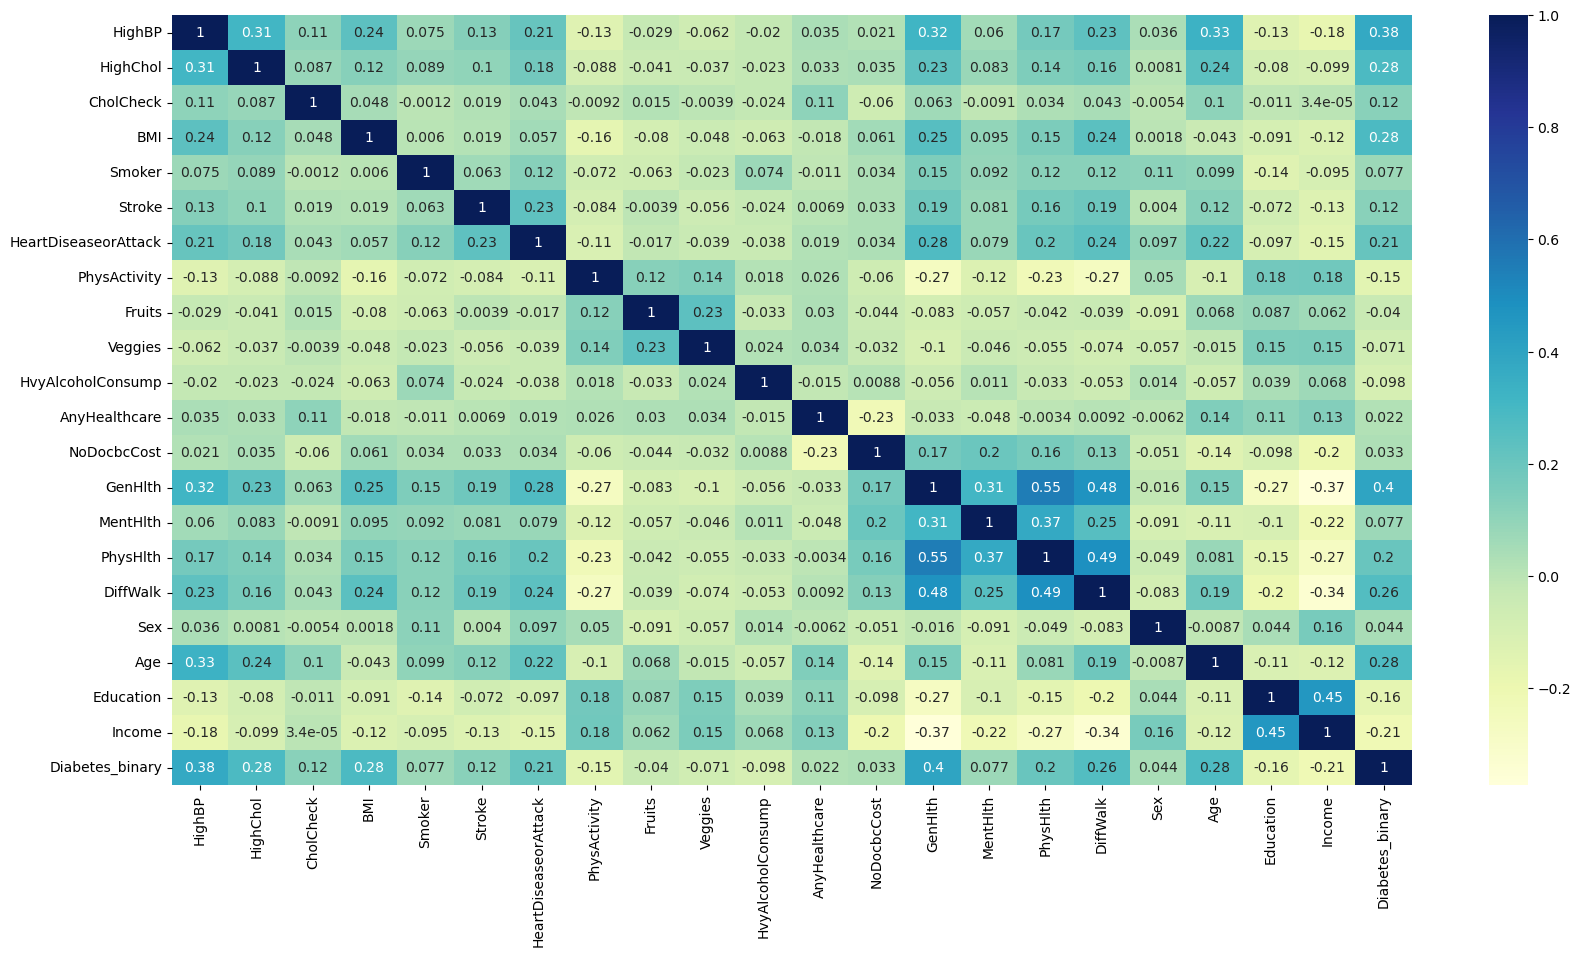

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

From the heatmap above, we notice that most of the attributes are not highly correlated with the 'Diabetes_binary'. The highest correlated attribute is 'GenHlth', coming up with 'HighBP' which stand for 'General Health' and 'High Blood Preasure'.

### Model Exploration to determine network topology
- 8 required

In [16]:
# Funtion to provide plot for loss and accuracy
def plot_acc_loss(results):
  plt.subplot(1,2,1)
  # summarize history for loss
  plt.plot(results.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(results.history['acc'])
  plt.title('model accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#### Build the model (relative large)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 13s 482us/sample - loss: 0.6931 - acc: 0.5058
Epoch 2/80
27947/27947 [==============================] - 11s 380us/sample - loss: 0.6931 - acc: 0.5067
Epoch 3/80
27947/27947 [==============================] - 11s 388us/sample - loss: 0.6931 - acc: 0.5067
Epoch 4/80
27947/27947 [==============================] - 11s 390us/sample - loss: 0.6931 - acc: 0.5067
Epoch 5/80
27947/27947 [==============================] - 10s 370us/sample - loss: 0.6931 - acc: 0.5067
Epoch 6/80
27947/27947 [==============================] - 11s 410us/sample - loss: 0.6931 - acc: 0.5067
Epoch 7/80
27947/27947 [==============================] - 10s 374us/sample - loss: 0.6931 - acc: 0.5067
Epoch 8/80
27947/27947 [==============================] - 10s 345us/sample - loss: 0.6931 - acc: 0.5067
Epoch 9/80
27947/27947 [==============================] - 10s 342us/sample - loss: 0.6931 - acc: 0.5067
Epoch 10/80
27947/27947 [================

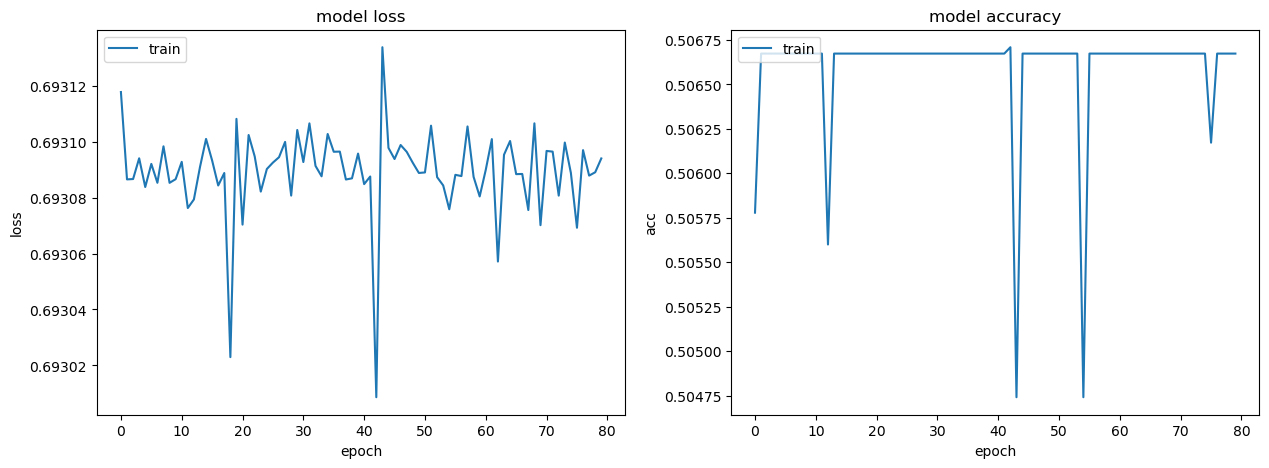

13765/13765 [==============================] - 5s 387us/sample - loss: 0.6931 - acc: 0.5067
Acuracy:  0.50671995
Predicted      1    All
Actual                 
0           6790   6790
1           6975   6975
All        13765  13765


In [17]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(1000, input_dim = 21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative large - medium)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 19s 693us/sample - loss: 0.5621 - acc: 0.7079
Epoch 2/80
27947/27947 [==============================] - 10s 345us/sample - loss: 0.5392 - acc: 0.7282
Epoch 3/80
27947/27947 [==============================] - 8s 301us/sample - loss: 0.5357 - acc: 0.7312
Epoch 4/80
27947/27947 [==============================] - 8s 291us/sample - loss: 0.5342 - acc: 0.7326
Epoch 5/80
27947/27947 [==============================] - 8s 281us/sample - loss: 0.5317 - acc: 0.7354
Epoch 6/80
27947/27947 [==============================] - 9s 306us/sample - loss: 0.5309 - acc: 0.7350
Epoch 7/80
27947/27947 [==============================] - 12s 421us/sample - loss: 0.5302 - acc: 0.7354
Epoch 8/80
27947/27947 [==============================] - 12s 422us/sample - loss: 0.5293 - acc: 0.7352
Epoch 9/80
27947/27947 [==============================] - 14s 518us/sample - loss: 0.5291 - acc: 0.7354
Epoch 10/80
27947/27947 [====================

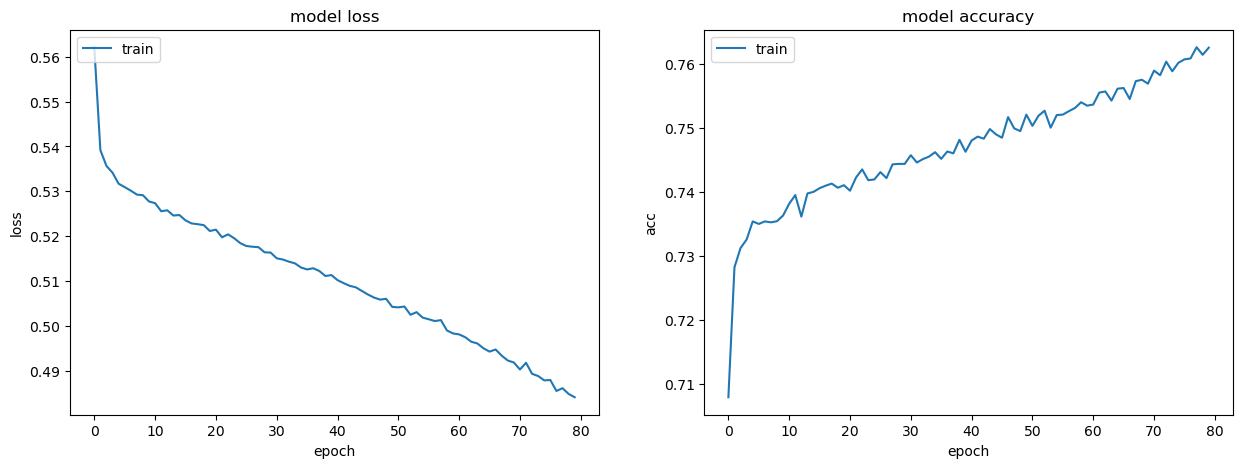

13765/13765 [==============================] - 4s 314us/sample - loss: 0.5402 - acc: 0.7355
Acuracy:  0.73548853
Predicted     0     1    All
Actual                      
0          4460  2330   6790
1          1311  5664   6975
All        5771  7994  13765


In [18]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(500, input_dim = 21, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative medium)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 13s 481us/sample - loss: 0.5778 - acc: 0.7024
Epoch 2/80
27947/27947 [==============================] - 11s 406us/sample - loss: 0.5406 - acc: 0.7295
Epoch 3/80
27947/27947 [==============================] - 12s 415us/sample - loss: 0.5359 - acc: 0.7309
Epoch 4/80
27947/27947 [==============================] - 12s 431us/sample - loss: 0.5344 - acc: 0.7316
Epoch 5/80
27947/27947 [==============================] - 13s 459us/sample - loss: 0.5319 - acc: 0.7352
Epoch 6/80
27947/27947 [==============================] - 12s 437us/sample - loss: 0.5313 - acc: 0.7349
Epoch 7/80
27947/27947 [==============================] - 12s 426us/sample - loss: 0.5307 - acc: 0.7352
Epoch 8/80
27947/27947 [==============================] - 12s 416us/sample - loss: 0.5294 - acc: 0.7360
Epoch 9/80
27947/27947 [==============================] - 12s 434us/sample - loss: 0.5291 - acc: 0.7352
Epoch 10/80
27947/27947 [================

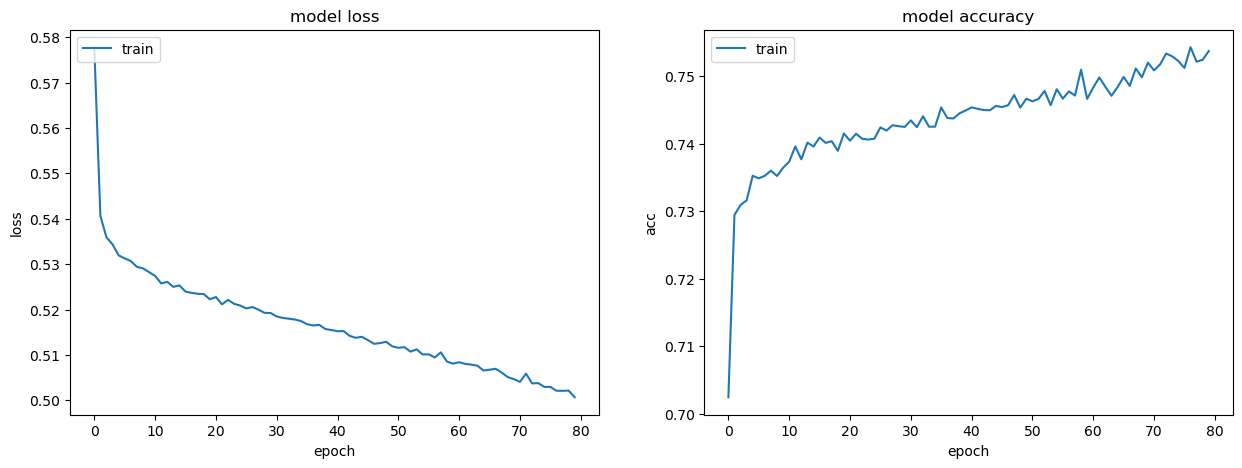

13765/13765 [==============================] - 2s 139us/sample - loss: 0.5265 - acc: 0.7383
Acuracy:  0.73832184
Predicted     0     1    All
Actual                      
0          4623  2167   6790
1          1435  5540   6975
All        6058  7707  13765


In [19]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(100, input_dim = 21, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Build the model (relative medium - small)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 5s 191us/sample - loss: 0.6094 - acc: 0.6795
Epoch 2/80
27947/27947 [==============================] - 5s 182us/sample - loss: 0.5483 - acc: 0.7253
Epoch 3/80
27947/27947 [==============================] - 5s 184us/sample - loss: 0.5407 - acc: 0.7291
Epoch 4/80
27947/27947 [==============================] - 5s 175us/sample - loss: 0.5379 - acc: 0.7303
Epoch 5/80
27947/27947 [==============================] - 5s 172us/sample - loss: 0.5347 - acc: 0.7343
Epoch 6/80
27947/27947 [==============================] - 5s 174us/sample - loss: 0.5341 - acc: 0.7330
Epoch 7/80
27947/27947 [==============================] - 5s 174us/sample - loss: 0.5331 - acc: 0.7324
Epoch 8/80
27947/27947 [==============================] - 5s 175us/sample - loss: 0.5327 - acc: 0.7342
Epoch 9/80
27947/27947 [==============================] - 5s 171us/sample - loss: 0.5324 - acc: 0.7354
Epoch 10/80
27947/27947 [=========================

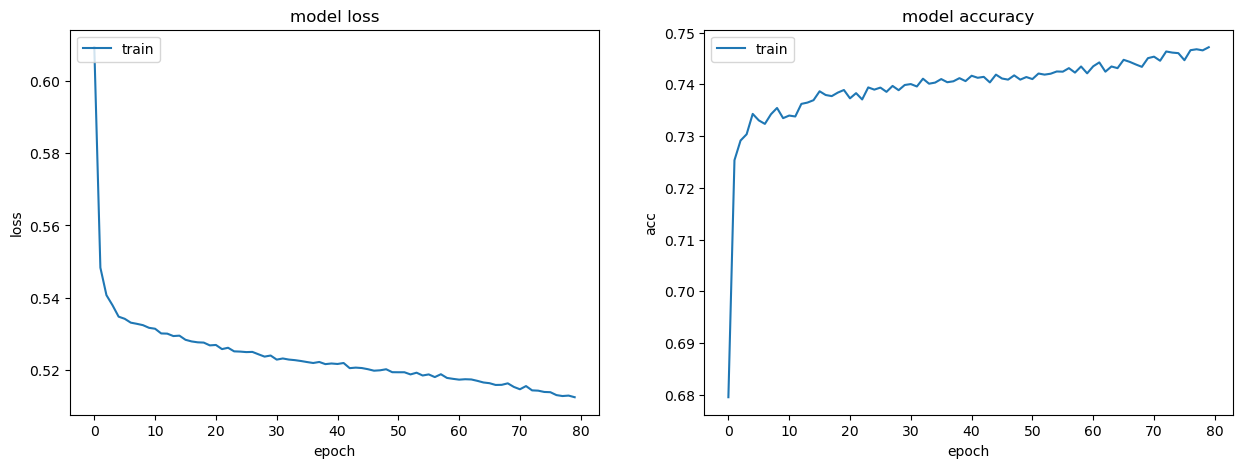

13765/13765 [==============================] - 2s 144us/sample - loss: 0.5220 - acc: 0.7388
Acuracy:  0.7388304
Predicted     0     1    All
Actual                      
0          4561  2229   6790
1          1366  5609   6975
All        5927  7838  13765


In [20]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(50, input_dim = 21, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()


# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

#### Building the model (relative small)

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 5s 193us/sample - loss: 0.6576 - acc: 0.6292
Epoch 2/80
27947/27947 [==============================] - 5s 170us/sample - loss: 0.5988 - acc: 0.6912
Epoch 3/80
27947/27947 [==============================] - 5s 168us/sample - loss: 0.5668 - acc: 0.7134
Epoch 4/80
27947/27947 [==============================] - 5s 174us/sample - loss: 0.5566 - acc: 0.7195
Epoch 5/80
27947/27947 [==============================] - 5s 167us/sample - loss: 0.5517 - acc: 0.7242
Epoch 6/80
27947/27947 [==============================] - 5s 172us/sample - loss: 0.5489 - acc: 0.7249
Epoch 7/80
27947/27947 [==============================] - 5s 174us/sample - loss: 0.5470 - acc: 0.7267
Epoch 8/80
27947/27947 [==============================] - 5s 169us/sample - loss: 0.5453 - acc: 0.7285
Epoch 9/80
27947/27947 [==============================] - 5s 170us/sample - loss: 0.5443 - acc: 0.7283
Epoch 10/80
27947/27947 [=========================

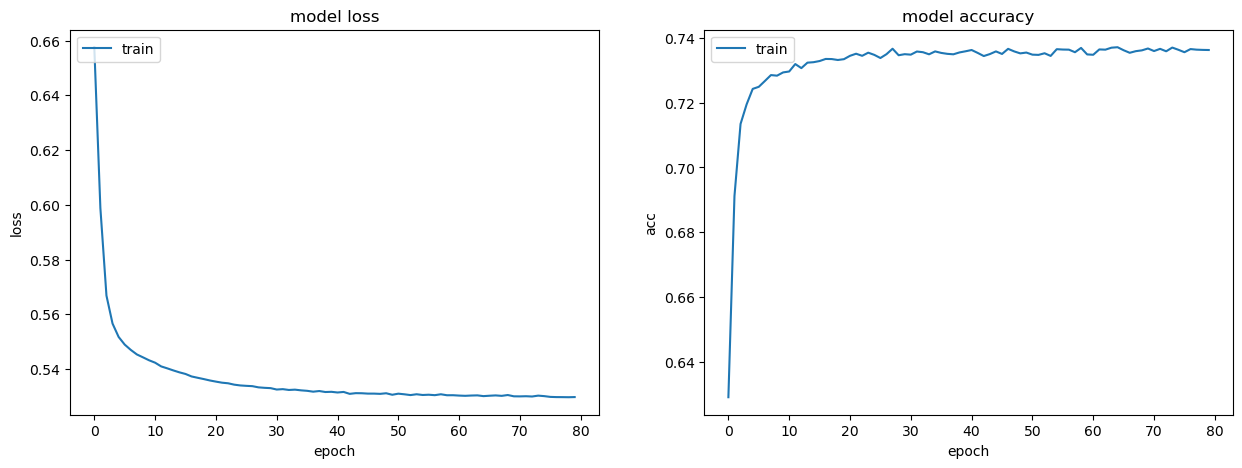

13765/13765 [==============================] - 2s 116us/sample - loss: 0.5359 - acc: 0.7300
Acuracy:  0.7299673
Predicted     0     1    All
Actual                      
0          4590  2200   6790
1          1517  5458   6975
All        6107  7658  13765


In [21]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(10, input_dim = 21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the test above from the models, we noticed that the small to medium model is perform way better than the large model. This might because of the correlation between attributes and the label class is not highly correlated, so the model will work better with small model. So for further testing, we will keep tuning in medium to small network.

#### Further testing - between small and small - medium

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 6s 200us/sample - loss: 0.6271 - acc: 0.6589
Epoch 2/80
27947/27947 [==============================] - 5s 180us/sample - loss: 0.5554 - acc: 0.7196
Epoch 3/80
27947/27947 [==============================] - 5s 186us/sample - loss: 0.5447 - acc: 0.7269
Epoch 4/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.5408 - acc: 0.7289
Epoch 5/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.5374 - acc: 0.7322
Epoch 6/80
27947/27947 [==============================] - 5s 178us/sample - loss: 0.5361 - acc: 0.7322
Epoch 7/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.5348 - acc: 0.7326
Epoch 8/80
27947/27947 [==============================] - 5s 178us/sample - loss: 0.5342 - acc: 0.7338
Epoch 9/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.5335 - acc: 0.7332
Epoch 10/80
27947/27947 [=========================

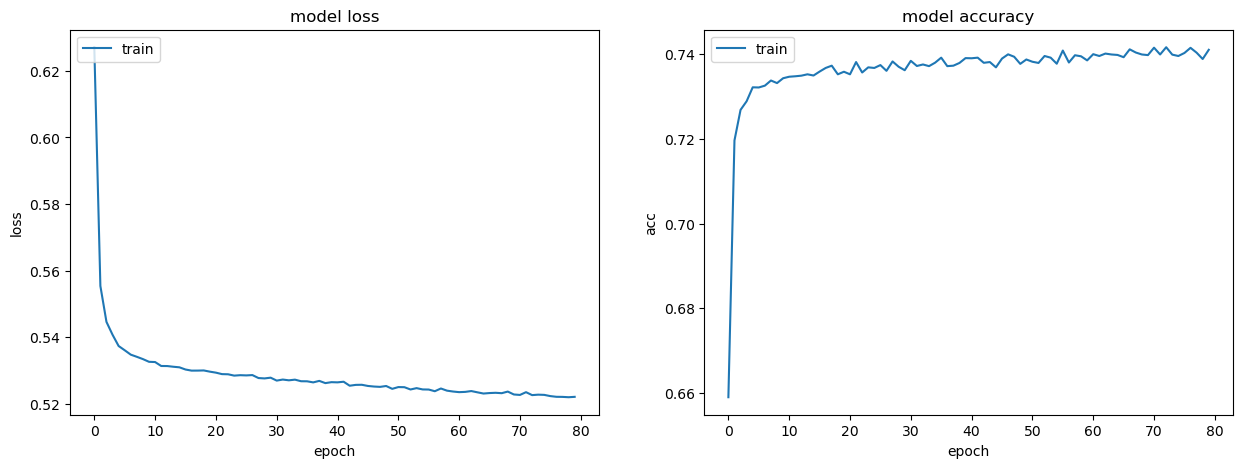

13765/13765 [==============================] - 2s 166us/sample - loss: 0.5287 - acc: 0.7376
Acuracy:  0.7375954
Predicted     0     1    All
Actual                      
0          4567  2223   6790
1          1389  5586   6975
All        5956  7809  13765


In [22]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(20, input_dim = 21, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Compare the result with small, the performance almost the same, maybe we can try with different number

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 6s 222us/sample - loss: 0.6692 - acc: 0.6074
Epoch 2/80
27947/27947 [==============================] - 6s 197us/sample - loss: 0.6093 - acc: 0.6886
Epoch 3/80
27947/27947 [==============================] - 5s 192us/sample - loss: 0.5792 - acc: 0.7047
Epoch 4/80
27947/27947 [==============================] - 5s 196us/sample - loss: 0.5656 - acc: 0.7152
Epoch 5/80
27947/27947 [==============================] - 5s 195us/sample - loss: 0.5588 - acc: 0.7201
Epoch 6/80
27947/27947 [==============================] - 5s 192us/sample - loss: 0.5549 - acc: 0.7210
Epoch 7/80
27947/27947 [==============================] - 5s 195us/sample - loss: 0.5524 - acc: 0.7235
Epoch 8/80
27947/27947 [==============================] - 6s 199us/sample - loss: 0.5504 - acc: 0.7254
Epoch 9/80
27947/27947 [==============================] - 6s 203us/sample - loss: 0.5492 - acc: 0.7243
Epoch 10/80
27947/27947 [=========================

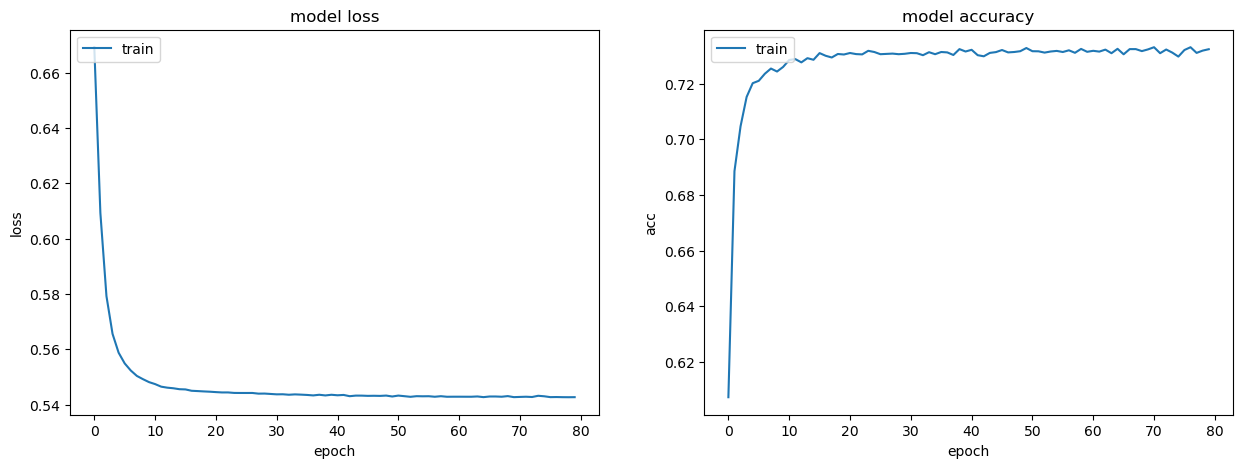

13765/13765 [==============================] - 2s 134us/sample - loss: 0.5469 - acc: 0.7244
Acuracy:  0.7243734
Predicted     0     1    All
Actual                      
0          4769  2021   6790
1          1773  5202   6975
All        6542  7223  13765


In [23]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 7s 251us/sample - loss: 0.6741 - acc: 0.5998
Epoch 2/80
27947/27947 [==============================] - 6s 210us/sample - loss: 0.6187 - acc: 0.6988
Epoch 3/80
27947/27947 [==============================] - 6s 204us/sample - loss: 0.5857 - acc: 0.7149
Epoch 4/80
27947/27947 [==============================] - 6s 206us/sample - loss: 0.5682 - acc: 0.7211
Epoch 5/80
27947/27947 [==============================] - 6s 204us/sample - loss: 0.5583 - acc: 0.7261
Epoch 6/80
27947/27947 [==============================] - 6s 204us/sample - loss: 0.5526 - acc: 0.7256
Epoch 7/80
27947/27947 [==============================] - 6s 203us/sample - loss: 0.5486 - acc: 0.7292
Epoch 8/80
27947/27947 [==============================] - 6s 206us/sample - loss: 0.5459 - acc: 0.7301
Epoch 9/80
27947/27947 [==============================] - 6s 212us/sample - loss: 0.5439 - acc: 0.7293
Epoch 10/80
27947/27947 [=========================

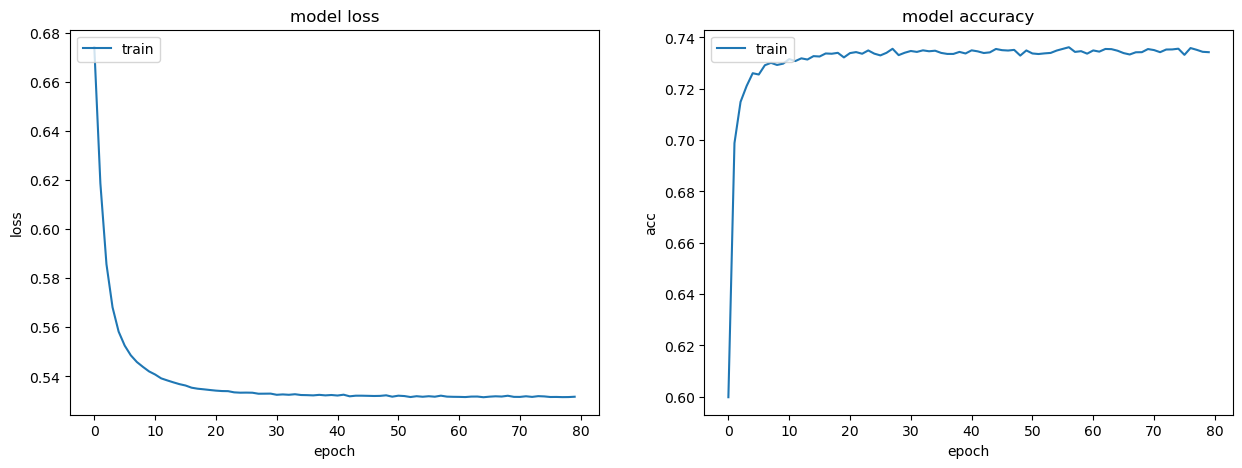

13765/13765 [==============================] - 2s 151us/sample - loss: 0.5377 - acc: 0.7295
Acuracy:  0.7295314
Predicted     0     1    All
Actual                      
0          4577  2213   6790
1          1510  5465   6975
All        6087  7678  13765


In [24]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

plot_acc_loss(results)

# generate predictions from text data
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

After some tweaking on the layers, the results showed that the accuracy is around 73%. So i'll use the last neural network as it got the highest accuracy on no diabetes which is 4938 / 6790.

### Hyperparameter investigation
- 8 batch sizes [suitable epochs]
- 3 optimizers
- 2 or more regularization techniques

In [25]:
# Funtion to provide plot for loss and accuracy
def plot_acc_loss2(results):
  plt.subplot(1,2,1)
  # summarize history for loss
  plt.plot(results.history['loss'])
  plt.plot(results.history['val_loss'])
  plt.title('Model Loss ')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(results.history['acc'])
  plt.plot(results.history['val_acc'])
  plt.title('Model Accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

#### Trying with different batch sizes and epochs.
- During the model was testing with different capacity and depth, the model were trained with batch sizes = 32. So we will tried other here.

 ************************ Testing ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/5
27947/27947 [==============================] - 208s 7ms/sample - loss: 0.6000 - acc: 0.6873 - val_loss: 0.5570 - val_acc: 0.7242
Epoch 2/5
27947/27947 [==============================] - 177s 6ms/sample - loss: 0.5499 - acc: 0.7262 - val_loss: 0.5488 - val_acc: 0.7220
Epoch 3/5
27947/27947 [==============================] - 185s 7ms/sample - loss: 0.5424 - acc: 0.7289 - val_loss: 0.5428 - val_acc: 0.7268
Epoch 4/5
27947/27947 [==============================] - 187s 7ms/sample - loss: 0.5388 - acc: 0.7302 - val_loss: 0.5425 - val_acc: 0.7235
Epoch 5/5
27947/27947 [==============================] - 198s 7ms/sample - loss: 0.5377 - acc: 0.7312 - val_loss: 0.5426 - val_acc: 0.7260
Batch Size :  1 
Epoch:  5


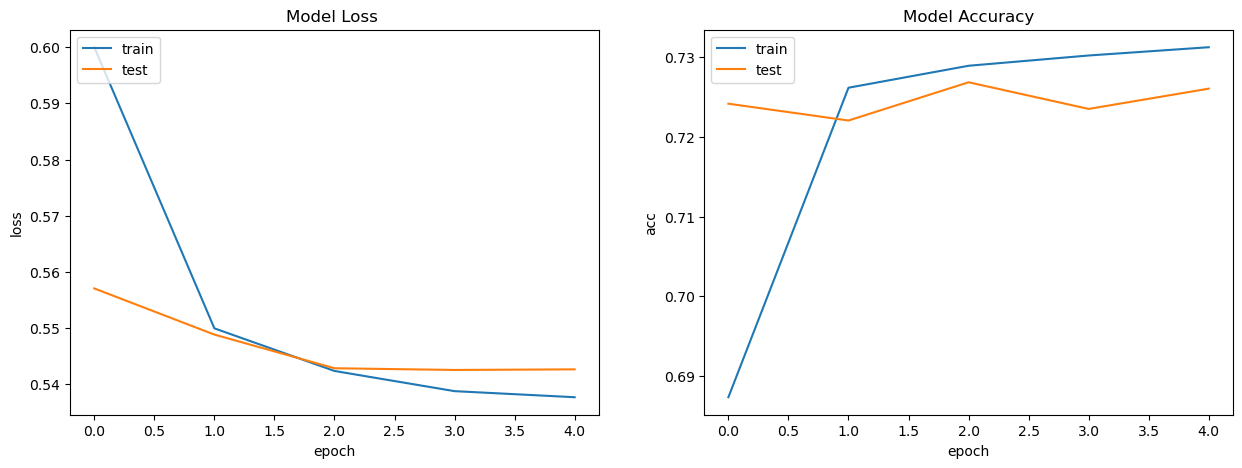

13765/13765 [==============================] - 2s 149us/sample - loss: 0.5426 - acc: 0.7260
Acuracy:  0.7260443
Predicted     0     1    All
Actual                      
0          4887  1903   6790
1          1868  5107   6975
All        6755  7010  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/30
27947/27947 [==============================] - 31s 1ms/sample - loss: 0.6467 - acc: 0.6424 - val_loss: 0.5732 - val_acc: 0.7089
Epoch 2/30
27947/27947 [==============================] - 31s 1ms/sample - loss: 0.5572 - acc: 0.7194 - val_loss: 0.5534 - val_acc: 0.7162
Epoch 3/30
27947/27947 [==============================] - 30s 1ms/sample - loss: 0.5473 - acc: 0.7248 - val_loss: 0.5533 - val_acc: 0.7202
Epoch 4/30
27947/27947 [==============================] - 31s 1ms/sample - loss: 0.5441 - acc: 0.7277 - val_loss: 0.5463 - val_acc: 0.7250
Epoch 5/30
27947/27947 [==============================] - 32s 1ms/sample - lo

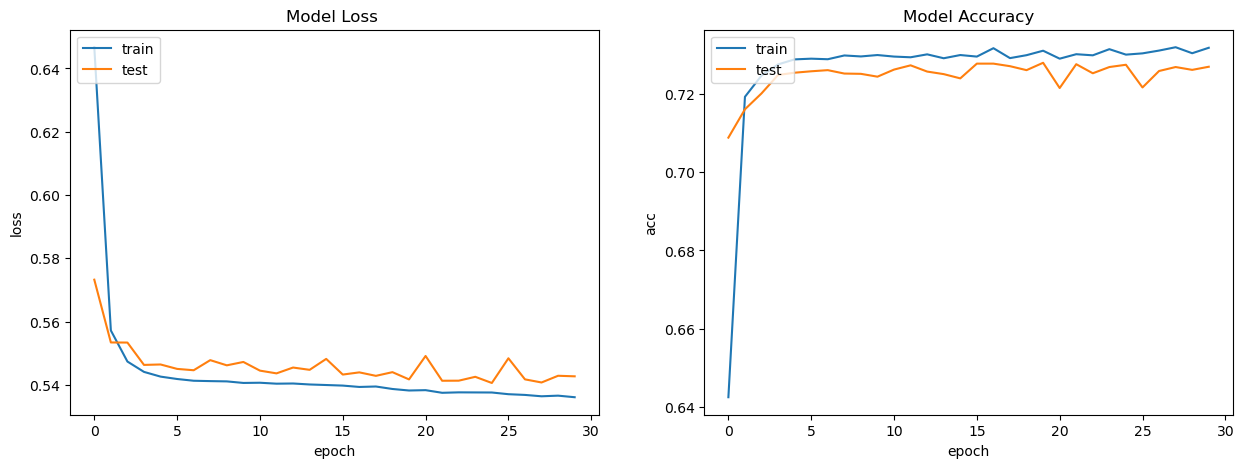

13765/13765 [==============================] - 2s 134us/sample - loss: 0.5427 - acc: 0.7271
Acuracy:  0.7270614
Predicted     0     1    All
Actual                      
0          4237  2553   6790
1          1204  5771   6975
All        5441  8324  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/50
27947/27947 [==============================] - 9s 321us/sample - loss: 0.6644 - acc: 0.5957 - val_loss: 0.6241 - val_acc: 0.6657
Epoch 2/50
27947/27947 [==============================] - 8s 277us/sample - loss: 0.5948 - acc: 0.6883 - val_loss: 0.5738 - val_acc: 0.6959
Epoch 3/50
27947/27947 [==============================] - 8s 273us/sample - loss: 0.5610 - acc: 0.7159 - val_loss: 0.5554 - val_acc: 0.7197
Epoch 4/50
27947/27947 [==============================] - 8s 282us/sample - loss: 0.5510 - acc: 0.7224 - val_loss: 0.5521 - val_acc: 0.7226
Epoch 5/50
27947/27947 [==============================] - 9s 309us/sample

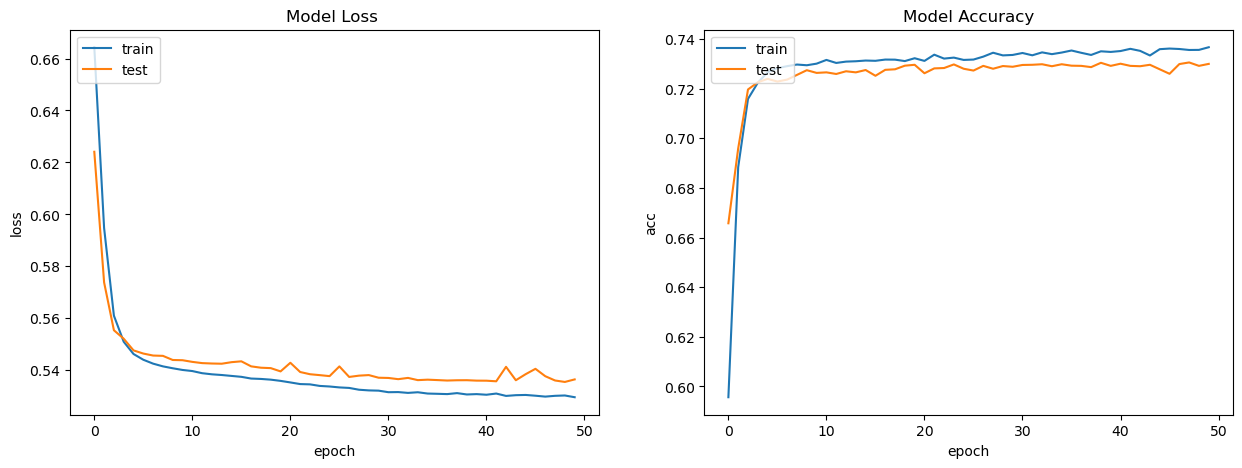

13765/13765 [==============================] - 2s 135us/sample - loss: 0.5365 - acc: 0.7300
Acuracy:  0.7299673
Predicted     0     1    All
Actual                      
0          4630  2160   6790
1          1557  5418   6975
All        6187  7578  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 5s 162us/sample - loss: 0.6864 - acc: 0.5586 - val_loss: 0.6677 - val_acc: 0.6385
Epoch 2/80
27947/27947 [==============================] - 4s 138us/sample - loss: 0.6457 - acc: 0.6762 - val_loss: 0.6273 - val_acc: 0.6968
Epoch 3/80
27947/27947 [==============================] - 4s 139us/sample - loss: 0.6128 - acc: 0.7037 - val_loss: 0.6004 - val_acc: 0.7081
Epoch 4/80
27947/27947 [==============================] - 4s 138us/sample - loss: 0.5909 - acc: 0.7144 - val_loss: 0.5835 - val_acc: 0.7156
Epoch 5/80
27947/27947 [==============================] - 4s 137us/sample

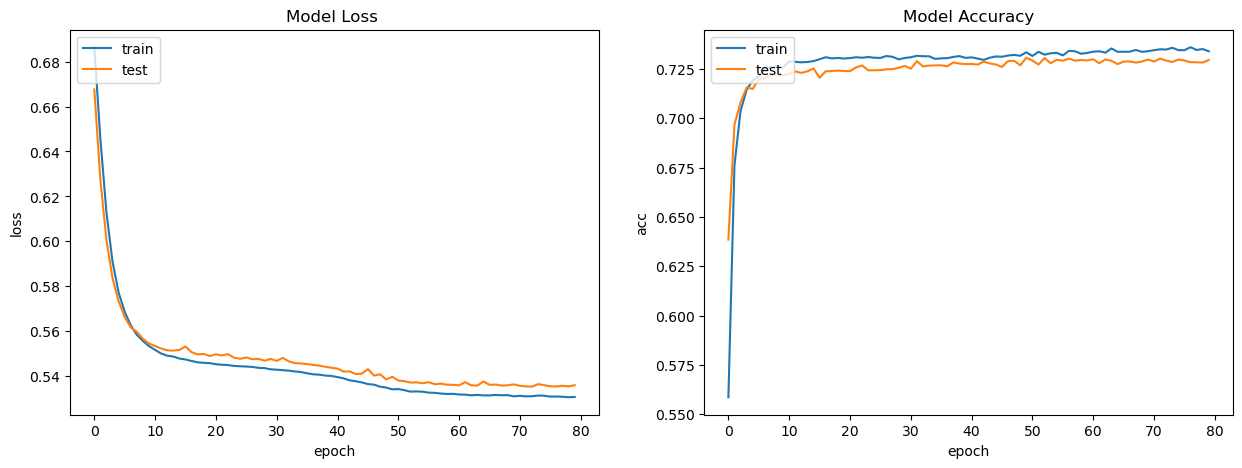

13765/13765 [==============================] - 2s 126us/sample - loss: 0.5359 - acc: 0.7295
Acuracy:  0.7295314
Predicted     0     1    All
Actual                      
0          4585  2205   6790
1          1518  5457   6975
All        6103  7662  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/100
27947/27947 [==============================] - 3s 102us/sample - loss: 0.6843 - acc: 0.6093 - val_loss: 0.6706 - val_acc: 0.6631
Epoch 2/100
27947/27947 [==============================] - 2s 64us/sample - loss: 0.6499 - acc: 0.6603 - val_loss: 0.6295 - val_acc: 0.6708
Epoch 3/100
27947/27947 [==============================] - 2s 68us/sample - loss: 0.6128 - acc: 0.6780 - val_loss: 0.5953 - val_acc: 0.6964
Epoch 4/100
27947/27947 [==============================] - 2s 66us/sample - loss: 0.5843 - acc: 0.6984 - val_loss: 0.5759 - val_acc: 0.7089
Epoch 5/100
27947/27947 [==============================] - 2s 67us/sampl

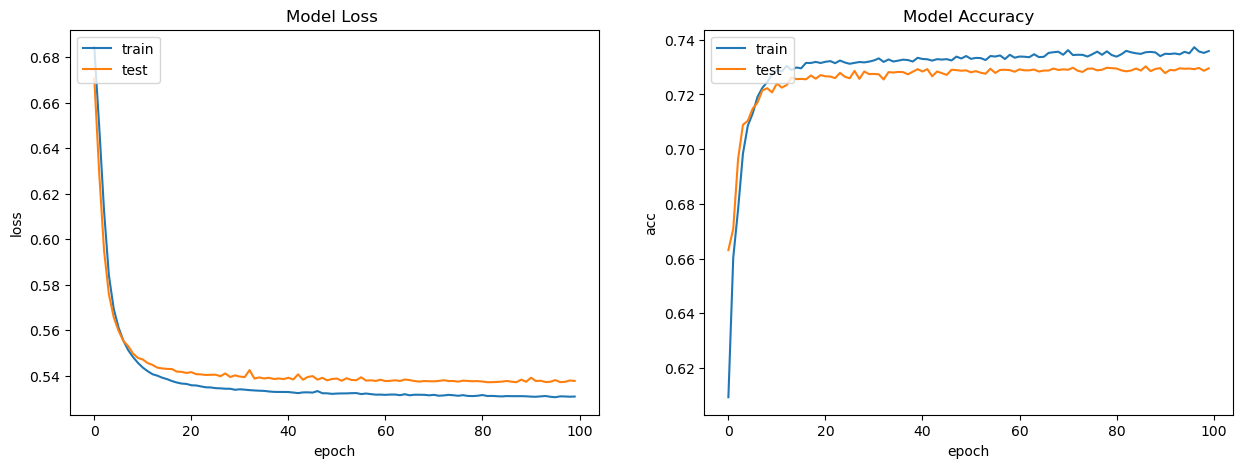

13765/13765 [==============================] - 2s 147us/sample - loss: 0.5378 - acc: 0.7295
Acuracy:  0.7295314
Predicted     0     1    All
Actual                      
0          4296  2494   6790
1          1229  5746   6975
All        5525  8240  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/100
27947/27947 [==============================] - 2s 68us/sample - loss: 0.6873 - acc: 0.5918 - val_loss: 0.6799 - val_acc: 0.6349
Epoch 2/100
27947/27947 [==============================] - 1s 35us/sample - loss: 0.6673 - acc: 0.6519 - val_loss: 0.6536 - val_acc: 0.6609
Epoch 3/100
27947/27947 [==============================] - 1s 34us/sample - loss: 0.6409 - acc: 0.6659 - val_loss: 0.6283 - val_acc: 0.6734
Epoch 4/100
27947/27947 [==============================] - 1s 35us/sample - loss: 0.6174 - acc: 0.6790 - val_loss: 0.6057 - val_acc: 0.6928
Epoch 5/100
27947/27947 [==============================] - 1s 38us/sample

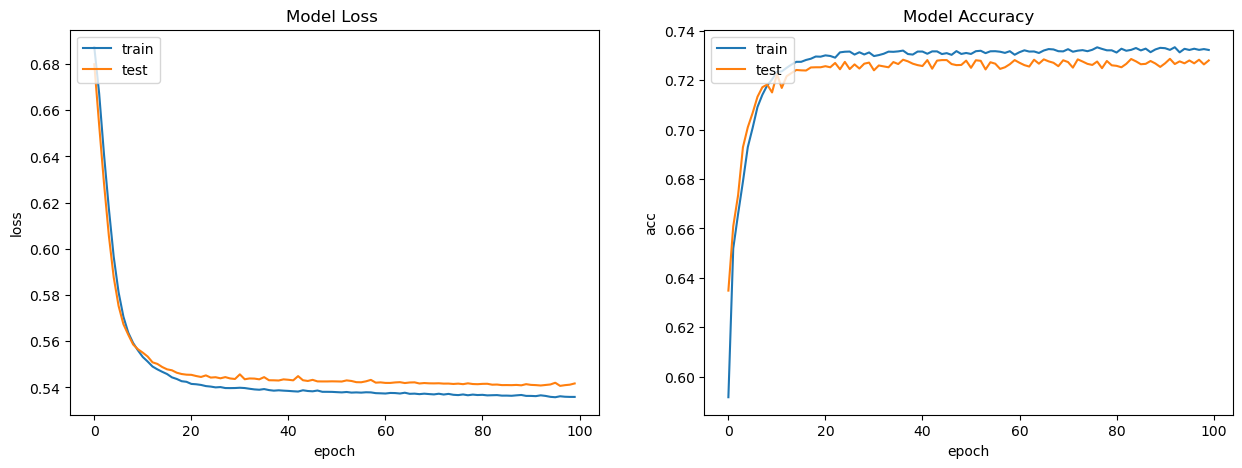

13765/13765 [==============================] - 2s 122us/sample - loss: 0.5417 - acc: 0.7279
Acuracy:  0.72793317
Predicted     0     1    All
Actual                      
0          4286  2504   6790
1          1241  5734   6975
All        5527  8238  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/120
27947/27947 [==============================] - 1s 43us/sample - loss: 0.6923 - acc: 0.5116 - val_loss: 0.6869 - val_acc: 0.5485
Epoch 2/120
27947/27947 [==============================] - 0s 16us/sample - loss: 0.6828 - acc: 0.5722 - val_loss: 0.6782 - val_acc: 0.5774
Epoch 3/120
27947/27947 [==============================] - 1s 20us/sample - loss: 0.6729 - acc: 0.5995 - val_loss: 0.6668 - val_acc: 0.6107
Epoch 4/120
27947/27947 [==============================] - 0s 17us/sample - loss: 0.6610 - acc: 0.6258 - val_loss: 0.6541 - val_acc: 0.6344
Epoch 5/120
27947/27947 [==============================] - 0s 17us/sampl

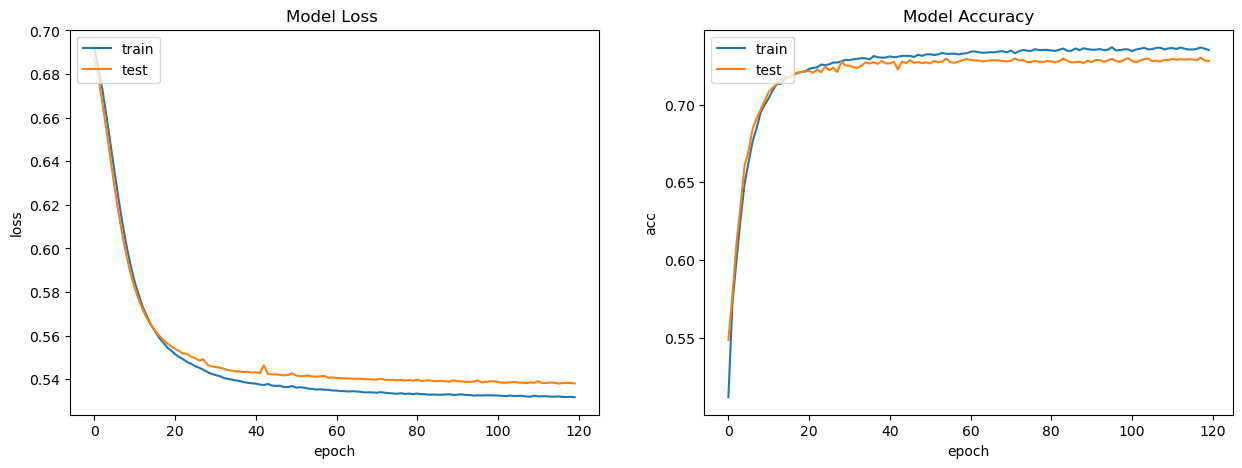

13765/13765 [==============================] - 2s 129us/sample - loss: 0.5381 - acc: 0.7282
Acuracy:  0.7281511
Predicted     0     1    All
Actual                      
0          4558  2232   6790
1          1510  5465   6975
All        6068  7697  13765
 ************************ Testing ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/120
27947/27947 [==============================] - 1s 35us/sample - loss: 0.6921 - acc: 0.4947 - val_loss: 0.6911 - val_acc: 0.5112
Epoch 2/120
27947/27947 [==============================] - 0s 8us/sample - loss: 0.6904 - acc: 0.5476 - val_loss: 0.6896 - val_acc: 0.5710
Epoch 3/120
27947/27947 [==============================] - 0s 9us/sample - loss: 0.6889 - acc: 0.5762 - val_loss: 0.6879 - val_acc: 0.5778
Epoch 4/120
27947/27947 [==============================] - 0s 9us/sample - loss: 0.6868 - acc: 0.5893 - val_loss: 0.6853 - val_acc: 0.5810
Epoch 5/120
27947/27947 [==============================] - 0s 12us/sample - 

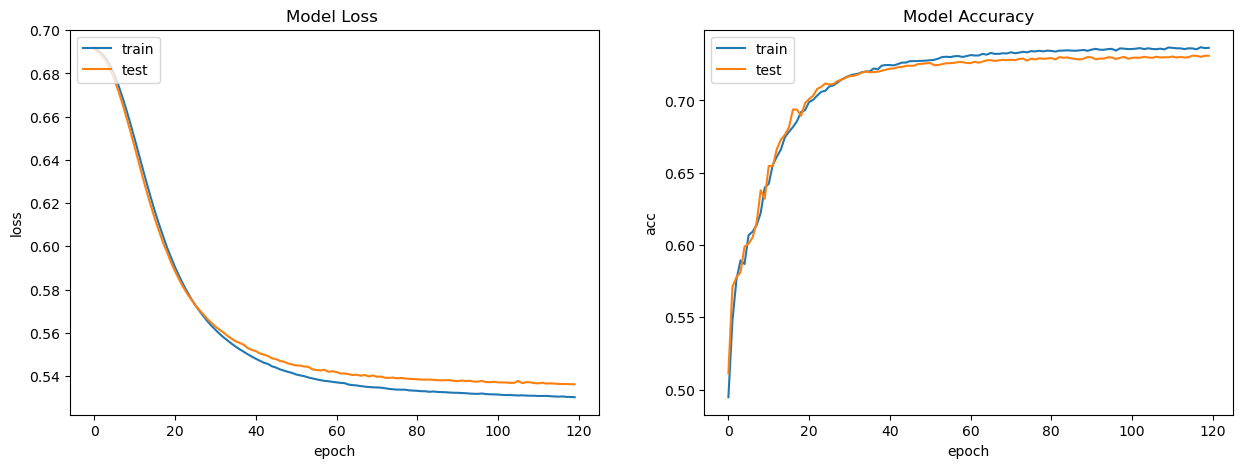

13765/13765 [==============================] - 2s 120us/sample - loss: 0.5362 - acc: 0.7309
Acuracy:  0.73091173
Predicted     0     1    All
Actual                      
0          4389  2401   6790
1          1303  5672   6975
All        5692  8073  13765


In [26]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

batchesToTest = [1, 8, 32, 64, 128, 256, 512, 1000]
epochToTest = [5, 30, 80, 80, 100, 100, 120, 120]

for index, batchesTest in enumerate(batchesToTest):
    print(" ************************ Testing ************************ ")

    model = Sequential()
    model.add(Dense(5, input_dim = 21, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    results = model.fit(X_train, Y_train, epochs=epochToTest[index], batch_size=batchesToTest[index], verbose=1, validation_data = (X_test, Y_test))

    print("Batch Size : ", batchesToTest[index], "\nEpoch: ", epochToTest[index])
    plot_acc_loss2(results)
    dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
    dl_y_pred = dl_y_pred.flatten()
    print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
    print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the graphs above, I have tried with 8 different batch sizes and epochs as following:
- Batch Sizes: [1, 8, 32, 64, 128, 256, 512, 1000]
- Epochs: [10, 30, 80, 80, 100, 100, 150, 150]

All the testing on every batch sizes has almost the same results which is around 74%, but the 32 batch sizes with 80 epochs has the best accuracy on 74.6%.

#### Trying with different Optimizers
- sgd
- rmspropm
- adagrad
- adam

 ************************ Testing SGD ************************ 


Train on 27947 samples
Epoch 1/80
27947/27947 [==============================] - 6s 205us/sample - loss: 0.6917 - acc: 0.5172
Epoch 2/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.6906 - acc: 0.5255
Epoch 3/80
27947/27947 [==============================] - 5s 180us/sample - loss: 0.6893 - acc: 0.5395
Epoch 4/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.6873 - acc: 0.5505
Epoch 5/80
27947/27947 [==============================] - 5s 179us/sample - loss: 0.6845 - acc: 0.5717
Epoch 6/80
27947/27947 [==============================] - 5s 188us/sample - loss: 0.6807 - acc: 0.5831
Epoch 7/80
27947/27947 [==============================] - 5s 179us/sample - loss: 0.6758 - acc: 0.5941
Epoch 8/80
27947/27947 [==============================] - 5s 183us/sample - loss: 0.6702 - acc: 0.6013
Epoch 9/80
27947/27947 [==============================] - 5s 181us/sample - loss: 0.6645 - acc: 0.6100
Epoch 10/80
27947/27947 [=========================

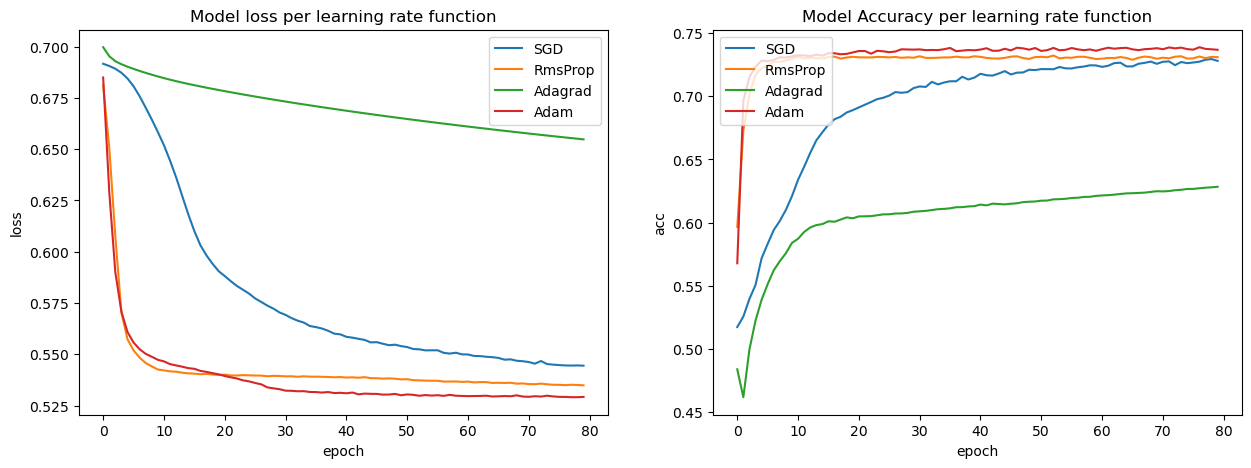

In [27]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing SGD ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])
results_sgd = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)


print(" ************************ Testing RMSPROP ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])
results_rmspropm = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)


print(" ************************ Testing ADAGRAD ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['acc'])
results_adagrad = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)


print(" ************************ Testing ADAM ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

results_adam = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1)

# Plotting Loss graph
plt.subplot(1,2,1)
plt.plot(results_sgd.history['loss'])
plt.plot(results_rmspropm.history['loss'])
plt.plot(results_adagrad.history['loss'])
plt.plot(results_adam.history['loss'])
plt.title('Model loss per learning rate function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGD', 'RmsProp', 'Adagrad', 'Adam'], loc='upper right')

plt.subplot(1,2,2)
plt.plot(results_sgd.history['acc'])
plt.plot(results_rmspropm.history['acc'])
plt.plot(results_adagrad.history['acc'])
plt.plot(results_adam.history['acc'])
plt.title('Model Accuracy per learning rate function')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['SGD', 'RmsProp', 'Adagrad', 'Adam'], loc='upper left')
plt.show()

From the graph above, we can noticed that the "Adagrad" and "SGD" optimizer is not working good, especially "Adagrad" only has around 60% accuracy and has almost 0.67 loss. The "Rmsprop" and "Adam" optimizers have similar accuracy (73%) and loss (0.52).

Hence, I will use the "Rmsprop" and "Adam" for the Grid Search.

#### Regularization Techniques
- Drop out
- Bias / No bias
- Glorot Uniform / Glorot Normal
- Checkpoint + Early Stopping

##### Dropout

 ************************ Testing With Dropout ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 13s 448us/sample - loss: 0.6886 - acc: 0.5274 - val_loss: 0.6761 - val_acc: 0.6432
Epoch 2/80
27947/27947 [==============================] - 11s 378us/sample - loss: 0.6717 - acc: 0.6046 - val_loss: 0.6469 - val_acc: 0.6891
Epoch 3/80
27947/27947 [==============================] - 11s 378us/sample - loss: 0.6538 - acc: 0.6318 - val_loss: 0.6209 - val_acc: 0.7045
Epoch 4/80
27947/27947 [==============================] - 11s 378us/sample - loss: 0.6444 - acc: 0.6400 - val_loss: 0.6075 - val_acc: 0.7115
Epoch 5/80
27947/27947 [==============================] - 10s 370us/sample - loss: 0.6368 - acc: 0.6514 - val_loss: 0.6023 - val_acc: 0.7050
Epoch 6/80
27947/27947 [==============================] - 10s 360us/sample - loss: 0.6296 - acc: 0.6570 - val_loss: 0.5936 - val_acc: 0.7155
Epoch 7/80
27947/27947 [==============================] - 10s 361us/sample - loss: 0.6284 - acc: 0.6605 

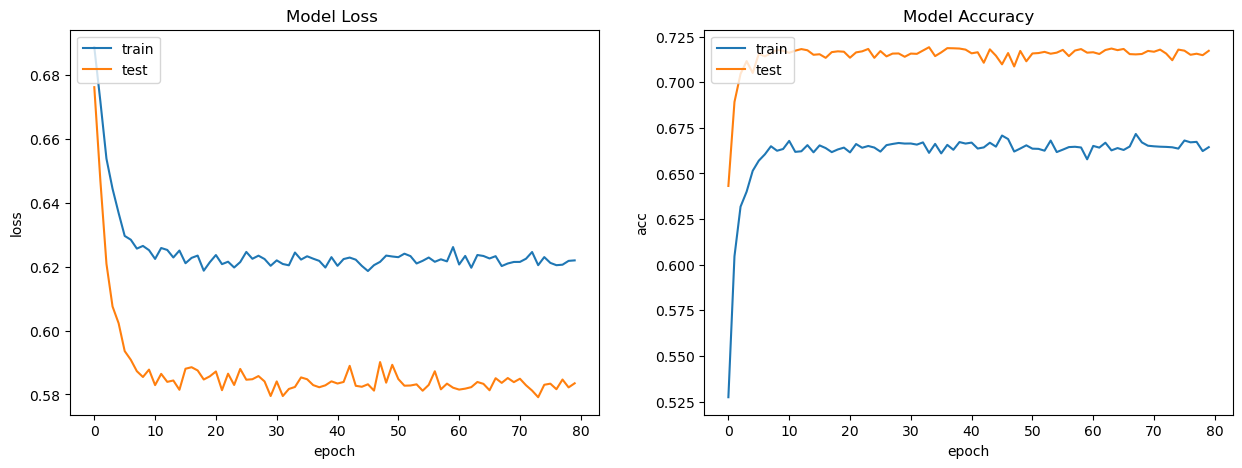

13765/13765 [==============================] - 1s 104us/sample - loss: 0.5835 - acc: 0.7172
Acuracy:  0.71718127
Predicted     0     1    All
Actual                      
0          4620  2170   6790
1          1723  5252   6975
All        6343  7422  13765


In [28]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing With Dropout ************************ ")
model = Sequential()
model.add(Dropout(0.2 , input_shape = (21,)))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

plot_acc_loss2(results)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

The first regularization techniques I used is the dropout function. I have set it to 0.2. This is to prevent the model overfitting to the dataset, as we can see from the graph that the accuracy for test dataset is perform better than the training dataset. However, the graph does not look great, so I not gonna use Dropout function in my final modal.

##### Bias / No Bias

 ************************ Testing Bias ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 7s 255us/sample - loss: 0.6741 - acc: 0.5998 - val_loss: 0.6429 - val_acc: 0.6910
Epoch 2/80
27947/27947 [==============================] - 6s 231us/sample - loss: 0.6187 - acc: 0.6988 - val_loss: 0.5996 - val_acc: 0.7078
Epoch 3/80
27947/27947 [==============================] - 6s 232us/sample - loss: 0.5857 - acc: 0.7149 - val_loss: 0.5758 - val_acc: 0.7194
Epoch 4/80
27947/27947 [==============================] - 7s 233us/sample - loss: 0.5682 - acc: 0.7211 - val_loss: 0.5638 - val_acc: 0.7228
Epoch 5/80
27947/27947 [==============================] - 6s 229us/sample - loss: 0.5583 - acc: 0.7261 - val_loss: 0.5567 - val_acc: 0.7208
Epoch 6/80
27947/27947 [==============================] - 7s 233us/sample - loss: 0.5526 - acc: 0.7256 - val_loss: 0.5523 - val_acc: 0.7256
Epoch 7/80
27947/27947 [==============================] - 6s 231us/sample - loss: 0.5486 - acc: 0.7292 - val_l

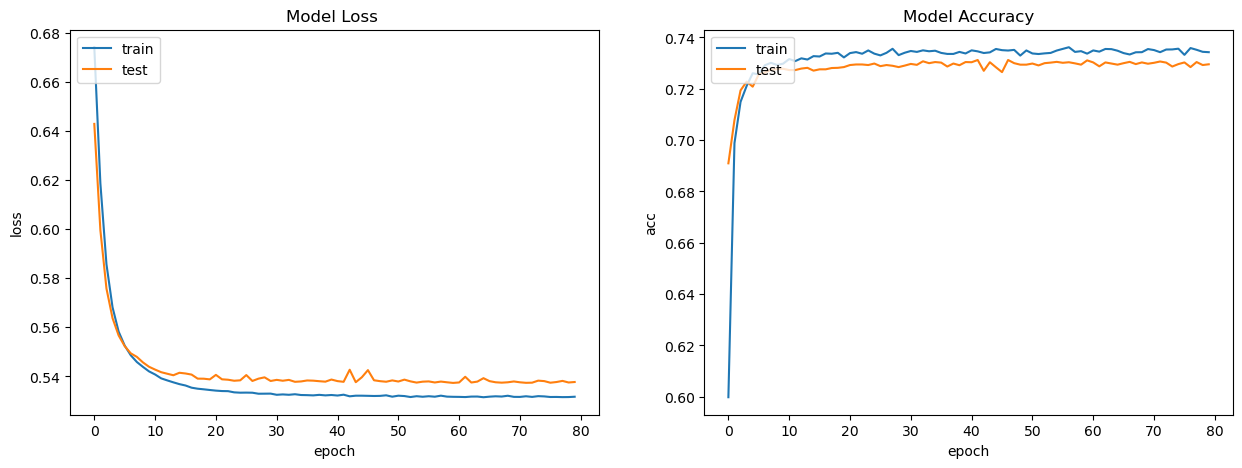

Graph for Bias
13765/13765 [==============================] - 1s 98us/sample - loss: 0.5377 - acc: 0.7295
Acuracy:  0.7295314
Predicted     0     1    All
Actual                      
0          4577  2213   6790
1          1510  5465   6975
All        6087  7678  13765


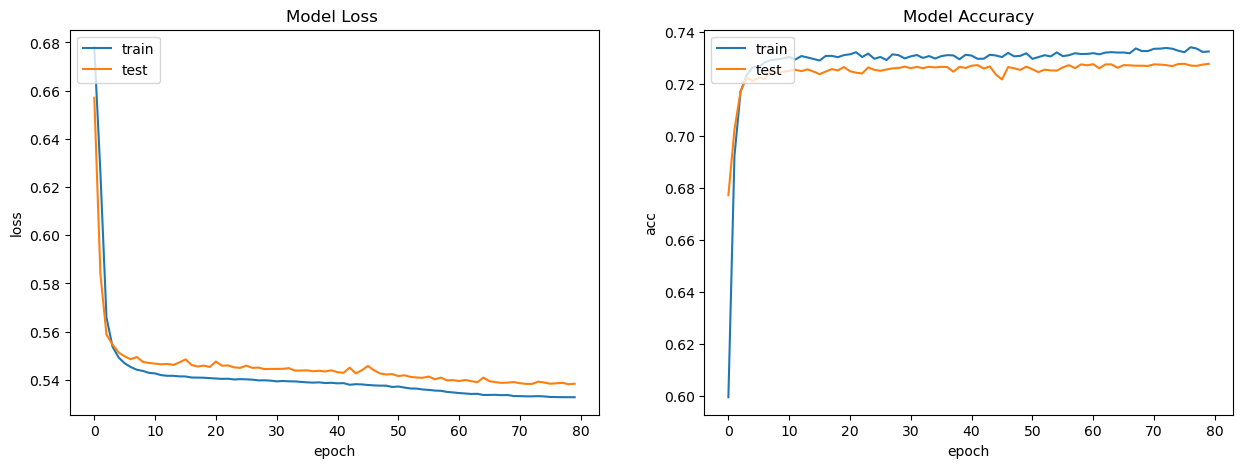

Graph for No Bias
13765/13765 [==============================] - 2s 111us/sample - loss: 0.5384 - acc: 0.7279
Acuracy:  0.7278605
Predicted     0     1    All
Actual                      
0          4488  2302   6790
1          1444  5531   6975
All        5932  7833  13765


In [29]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing Bias ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', use_bias = True))
model.add(Dense(3, activation='relu', use_bias = True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_bias = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


print(" ************************ Testing No Bias ************************ ")
model2 = Sequential()
model2.add(Dense(5, input_dim = 21, activation='relu', use_bias = False))
model2.add(Dense(3, activation='relu', use_bias = False))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_no_bias = model2.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


plot_acc_loss2(results_bias)
print('Graph for Bias')
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

plot_acc_loss2(results_no_bias)
print('Graph for No Bias')
dl_y_pred = (model2.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model2.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the graphs and metrices above, I would say that the models worked better when with 'No - Bias' with high accuracy on detecting people who has diabetes. However, I will stick with 'Bias' on my final modal since both of the functions actually has similar accuracy with 73%.

##### Glorot Uniform / Glorot Normal

 ************************ Testing Glorot Uniform ************************ 


Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27947/27947 [==============================] - 7s 257us/sample - loss: 0.6741 - acc: 0.5998 - val_loss: 0.6429 - val_acc: 0.6910
Epoch 2/80
27947/27947 [==============================] - 6s 232us/sample - loss: 0.6187 - acc: 0.6988 - val_loss: 0.5996 - val_acc: 0.7078
Epoch 3/80
27947/27947 [==============================] - 7s 233us/sample - loss: 0.5857 - acc: 0.7149 - val_loss: 0.5758 - val_acc: 0.7194
Epoch 4/80
27947/27947 [==============================] - 7s 234us/sample - loss: 0.5682 - acc: 0.7211 - val_loss: 0.5638 - val_acc: 0.7228
Epoch 5/80
27947/27947 [==============================] - 6s 232us/sample - loss: 0.5583 - acc: 0.7261 - val_loss: 0.5567 - val_acc: 0.7208
Epoch 6/80
27947/27947 [==============================] - 6s 231us/sample - loss: 0.5526 - acc: 0.7256 - val_loss: 0.5523 - val_acc: 0.7256
Epoch 7/80
27947/27947 [==============================] - 7s 235us/sample - loss: 0.5486 - acc: 0.7292 - val_l

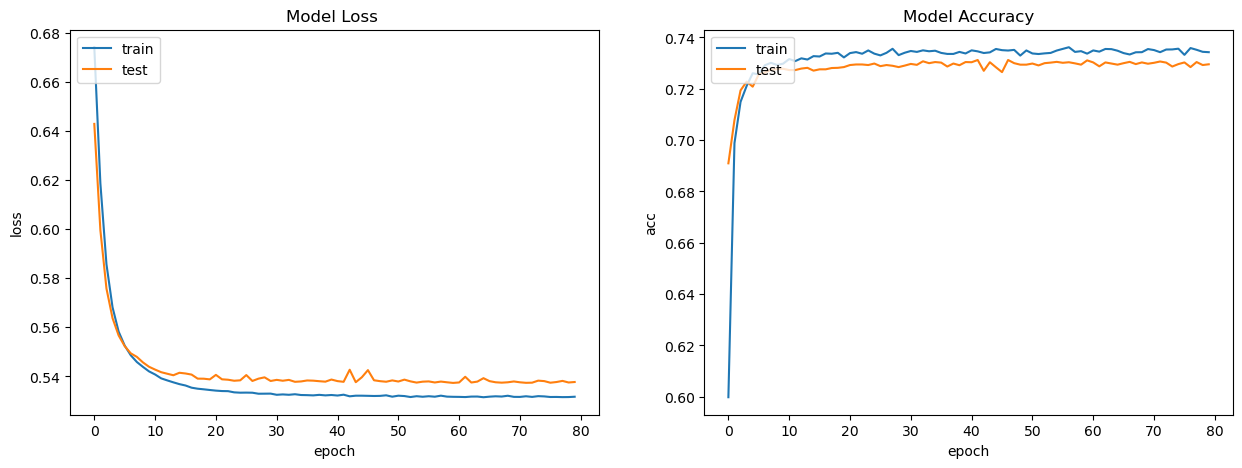

13765/13765 [==============================] - 2s 117us/sample - loss: 0.5377 - acc: 0.7295
Acuracy:  0.7295314
Predicted     0     1    All
Actual                      
0          4577  2213   6790
1          1510  5465   6975
All        6087  7678  13765
Graph for Normal


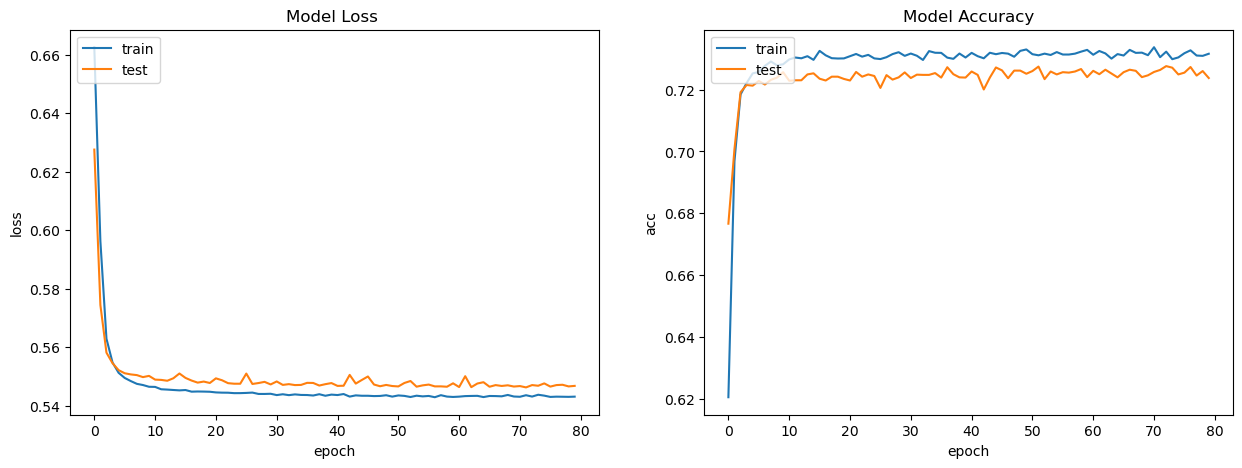

13765/13765 [==============================] - 1s 106us/sample - loss: 0.5468 - acc: 0.7237
Acuracy:  0.7237196
Predicted     0     1    All
Actual                      
0          4748  2042   6790
1          1761  5214   6975
All        6509  7256  13765


In [30]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing Glorot Uniform ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(3, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_uni = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))


print(" ************************ Testing Glorot Normal ************************ ")
model2 = Sequential()
model2.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model2.add(Dense(3, activation='relu', kernel_initializer="GlorotNormal"))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_nor = model2.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

print('Graph for Uniform')
plot_acc_loss2(results_uni)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

print('Graph for Normal')
plot_acc_loss2(results_nor)
dl_y_pred = (model2.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model2.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the graph above, we can see that the Glorot Uniform and Glorot Normal have similr accuracy but the Glorot Normal has less loss comapare to the Glorot Uniform. So we will use Glorot Normal for the Grid Search technique.

##### Checkpoint + Early Stopping

 ************************ Testing  Checkpoint + Early Stopping ************************ 
Train on 27947 samples, validate on 13765 samples
Epoch 1/80
27776/27947 [============================>.] - ETA: 0s - loss: 0.6744 - acc: 0.5992
Epoch 00001: acc improved from -inf to 0.59985, saving model to myBest.hdf5
27947/27947 [==============================] - 7s 267us/sample - loss: 0.6741 - acc: 0.5998 - val_loss: 0.6429 - val_acc: 0.6910
Epoch 2/80
27872/27947 [============================>.] - ETA: 0s - loss: 0.6187 - acc: 0.6988
Epoch 00002: acc improved from 0.59985 to 0.69882, saving model to myBest.hdf5
27947/27947 [==============================] - 7s 233us/sample - loss: 0.6187 - acc: 0.6988 - val_loss: 0.5996 - val_acc: 0.7078
Epoch 3/80
27840/27947 [============================>.] - ETA: 0s - loss: 0.5857 - acc: 0.7150
Epoch 00003: acc improved from 0.69882 to 0.71489, saving model to myBest.hdf5
27947/27947 [==============================] - 7s 233us/sample - loss: 0.5857 - acc:

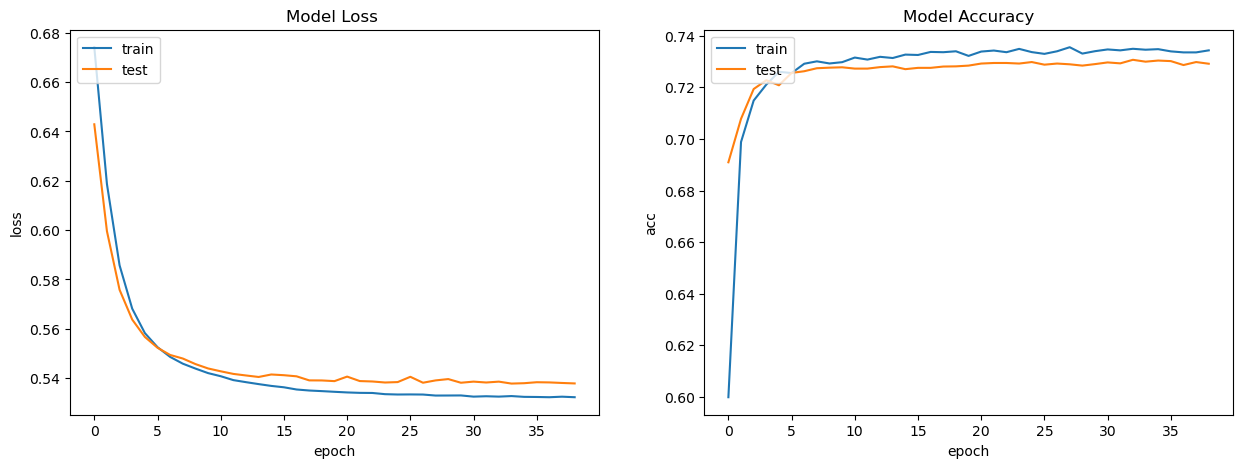

13765/13765 [==============================] - 1s 107us/sample - loss: 0.5379 - acc: 0.7292
Acuracy:  0.7291682
Predicted     0     1    All
Actual                      
0          4495  2295   6790
1          1433  5542   6975
All        5928  7837  13765


In [31]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

print(" ************************ Testing  Checkpoint + Early Stopping ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="val_loss",patience= 5)
callbacks_list = [checkpoint, earlystopping]

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, callbacks=callbacks_list, validation_data=(X_test, Y_test))
plot_acc_loss2(results)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

From the verbose above, we know that the early stopping is working as the epoch stop at around 49 even we set it at 80 epcohs.

### Grid search
- best 4 batch sizes
- best 2 optimizers
- 1 weight initializer
- 3 epochs
- early stopping allowed

In [13]:
# Function (Step) of model for training
def gs_model(optimizerIn='adam', initIn='GlorotNormal'):
    model = Sequential()
    model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer=initIn))
    model.add(Dense(3, activation='relu', kernel_initializer=initIn))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizerIn, metrics=['acc'])
    return model

In [14]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = KerasClassifier(build_fn=gs_model)

# grid search epochs, batch size and optimizer
batches = [32, 64, 128, 256]
optimizers = ['rmsprop', 'adam']
epochs = [30, 80, 120]

# Checkpointing + Early Stopping
checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="loss",patience= 3)
callbacks_list = [checkpoint, earlystopping]

param_grid = dict(optimizerIn=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train, callbacks=callbacks_list)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Train on 22357 samples
Epoch 1/30
22336/22357 [============================>.] - ETA: 0s - loss: 0.6835 - acc: 0.5857
Epoch 00001: acc improved from -inf to 0.58563, saving model to myBest.hdf5
22357/22357 [==============================] - 12s 532us/sample - loss: 0.6835 - acc: 0.5856
Epoch 2/30
22272/22357 [============================>.] - ETA: 0s - loss: 0.6596 - acc: 0.6710
Epoch 00002: acc improved from 0.58563 to 0.67106, saving model to myBest.hdf5
22357/22357 [==============================] - 10s 434us/sample - loss: 0.6596 - acc: 0.6711
Epoch 3/30
22336/22357 [============================>.] - ETA: 0s - loss: 0.6350 - acc: 0.6854
Epoch 00003: acc improved from 0.67106 to 0.68542, saving model to myBest.hdf5
22357/22357 [==============================] - 9s 406us/sample - loss: 0.6350 - acc: 0.6854
Epoch 4/30
22304/22357 [============================>.] - ETA: 0s - loss: 0.6091 - acc: 0.7034
Epoch 00004: acc improved from 0.68542 to 0.70336, saving model to myBest.hdf5
22357/

From the Grid Search results above, we able to know that the best model will be using batch_size: 32, epochs: 80, optimizer: RMSPROP, with intializer: Glorot Normal. The accuracy for the overall grid search remian from 68.7% - 74.5%, with 0.02 - 0.09 loss.

### Final Model presentation and performance evaluation


 ************************ Final Model Testing ************************ 
Epoch 1/80
874/874 [==============================] - 3s 3ms/step - loss: 0.6900 - acc: 0.5613 - val_loss: 0.6827 - val_acc: 0.5839
Epoch 2/80
874/874 [==============================] - 3s 4ms/step - loss: 0.6661 - acc: 0.6078 - val_loss: 0.6451 - val_acc: 0.6679
Epoch 3/80
874/874 [==============================] - 2s 2ms/step - loss: 0.6168 - acc: 0.6700 - val_loss: 0.5913 - val_acc: 0.6934
Epoch 4/80
874/874 [==============================] - 2s 3ms/step - loss: 0.5776 - acc: 0.6974 - val_loss: 0.5678 - val_acc: 0.7106
Epoch 5/80
874/874 [==============================] - 2s 2ms/step - loss: 0.5598 - acc: 0.7155 - val_loss: 0.5572 - val_acc: 0.7171
Epoch 6/80
874/874 [==============================] - 2s 2ms/step - loss: 0.5522 - acc: 0.7199 - val_loss: 0.5536 - val_acc: 0.7199
Epoch 7/80
874/874 [==============================] - 3s 3ms/step - loss: 0.5486 - acc: 0.7243 - val_loss: 0.5510 - val_acc: 0.7239
Epoc

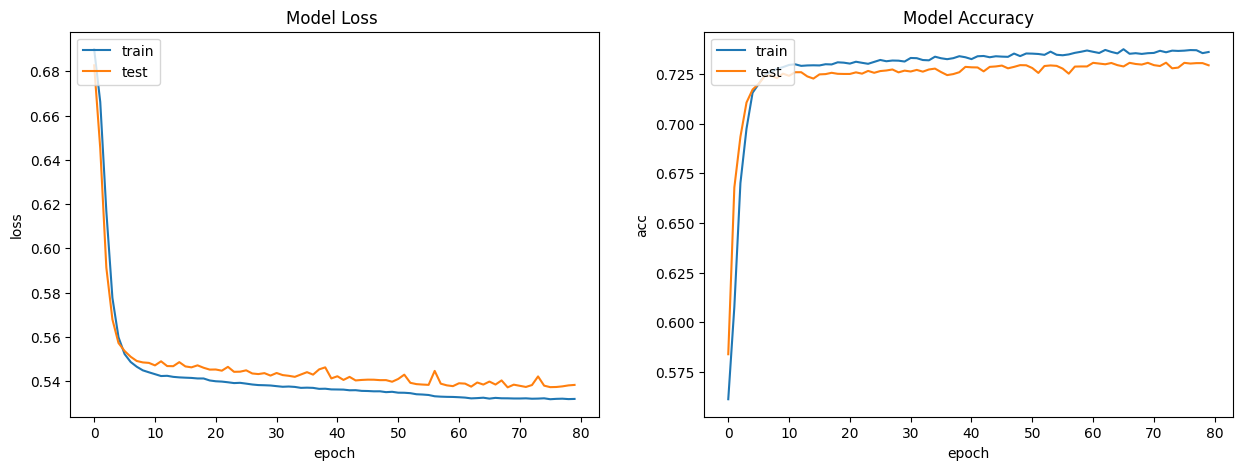

431/431 [==============================] - 1s 1ms/step - loss: 0.5382 - acc: 0.7293
Acuracy:  0.7293134927749634
Predicted     0     1    All
Actual                      
0          4741  2049   6790
1          1677  5298   6975
All        6418  7347  13765


In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)


print(" ************************ Final Model Testing ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, shuffle = True, validation_data=(X_test, Y_test))
plot_acc_loss2(results)
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()
print("Acuracy: ", model.evaluate(X_test,Y_test)[1])
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


### Analysis of performance per class

In [ ]:
from sklearn.metrics import classification_report

dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
report = classification_report(Y_test, dl_y_pred)
print(report)

431/431 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      6790
           1       0.71      0.77      0.74      6975

    accuracy                           0.73     13765
   macro avg       0.73      0.73      0.73     13765
weighted avg       0.73      0.73      0.73     13765



### Additional Checks for Overfitting
- Using raw data (De-normalizing the data)
- Adding class value as input attribute

In [ ]:
test_size = 0.33
# raw data
X_train_raw, X_test_raw, Y_train_raw, Y_test_raw  = train_test_split(X, Y, test_size=test_size, random_state=seed)

 ************************ Testing for Overfitting ************************ 
Epoch 1/80
874/874 [==============================] - 51s 7ms/step - loss: 0.6814 - acc: 0.5755 - val_loss: 0.6577 - val_acc: 0.6279
Epoch 2/80
874/874 [==============================] - 2s 2ms/step - loss: 0.6278 - acc: 0.6613 - val_loss: 0.6009 - val_acc: 0.7000
Epoch 3/80
874/874 [==============================] - 3s 4ms/step - loss: 0.5802 - acc: 0.7024 - val_loss: 0.5654 - val_acc: 0.7138
Epoch 4/80
874/874 [==============================] - 2s 2ms/step - loss: 0.5571 - acc: 0.7178 - val_loss: 0.5539 - val_acc: 0.7194
Epoch 5/80
874/874 [==============================] - 3s 3ms/step - loss: 0.5497 - acc: 0.7245 - val_loss: 0.5496 - val_acc: 0.7205
Epoch 6/80
874/874 [==============================] - 2s 2ms/step - loss: 0.5455 - acc: 0.7254 - val_loss: 0.5481 - val_acc: 0.7208
Epoch 7/80
874/874 [==============================] - 2s 3ms/step - loss: 0.5429 - acc: 0.7296 - val_loss: 0.5459 - val_acc: 0.7266

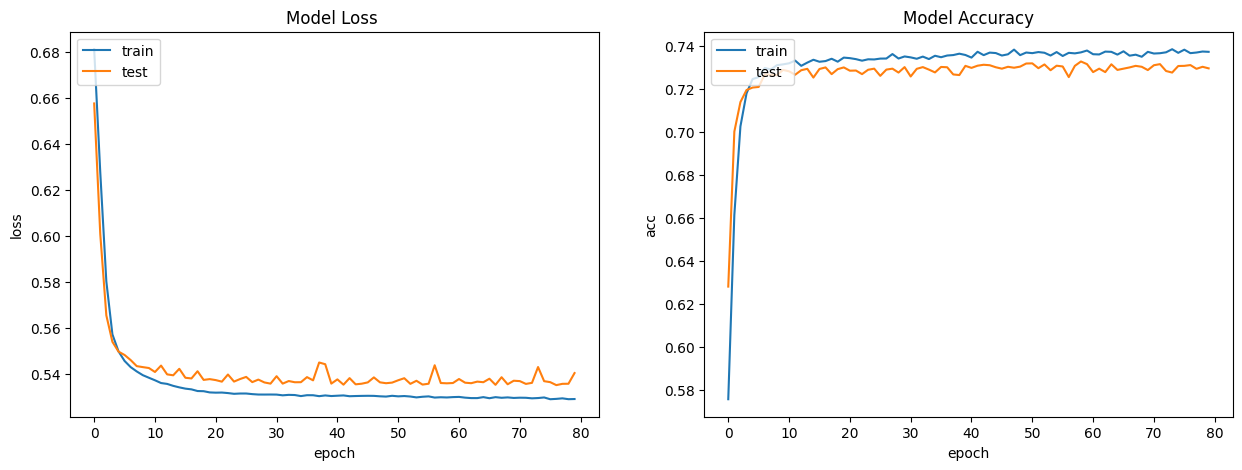



********** Performance on normalized data: ********** 
431/431 [==============================] - 1s 2ms/step - loss: 0.5403 - acc: 0.7295
Acuracy:  72.9458749294281 %


********** Performance on raw un-normalized data: ********** 
431/431 [==============================] - 1s 2ms/step - loss: 7.5644 - acc: 0.7100
Acuracy:  70.99891304969788 %


In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)


print(" ************************ Testing for Overfitting ************************ ")
model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, shuffle = True, validation_data=(X_test, Y_test))
plot_acc_loss2(results)


print("\n\n********** Performance on normalized data: ********** ")
print("Acuracy: ", model.evaluate(X_test,Y_test)[1] *100, "%")

print("\n\n********** Performance on raw un-normalized data: ********** ")
print("Acuracy: ", model.evaluate(X_test_raw,Y_test_raw)[1] *100, "%")

### Analysis of performance for target group
- 2 group required

I have choosen the high blood plessure group and Heart Disease Attack Group. I choose these because I'm wondering if the blood pressure will effect diabetes control on people. Besides that, I'm wondering if people is suffering on Diabetes, will they suffer with heart attack disease as well.

<Axes: >

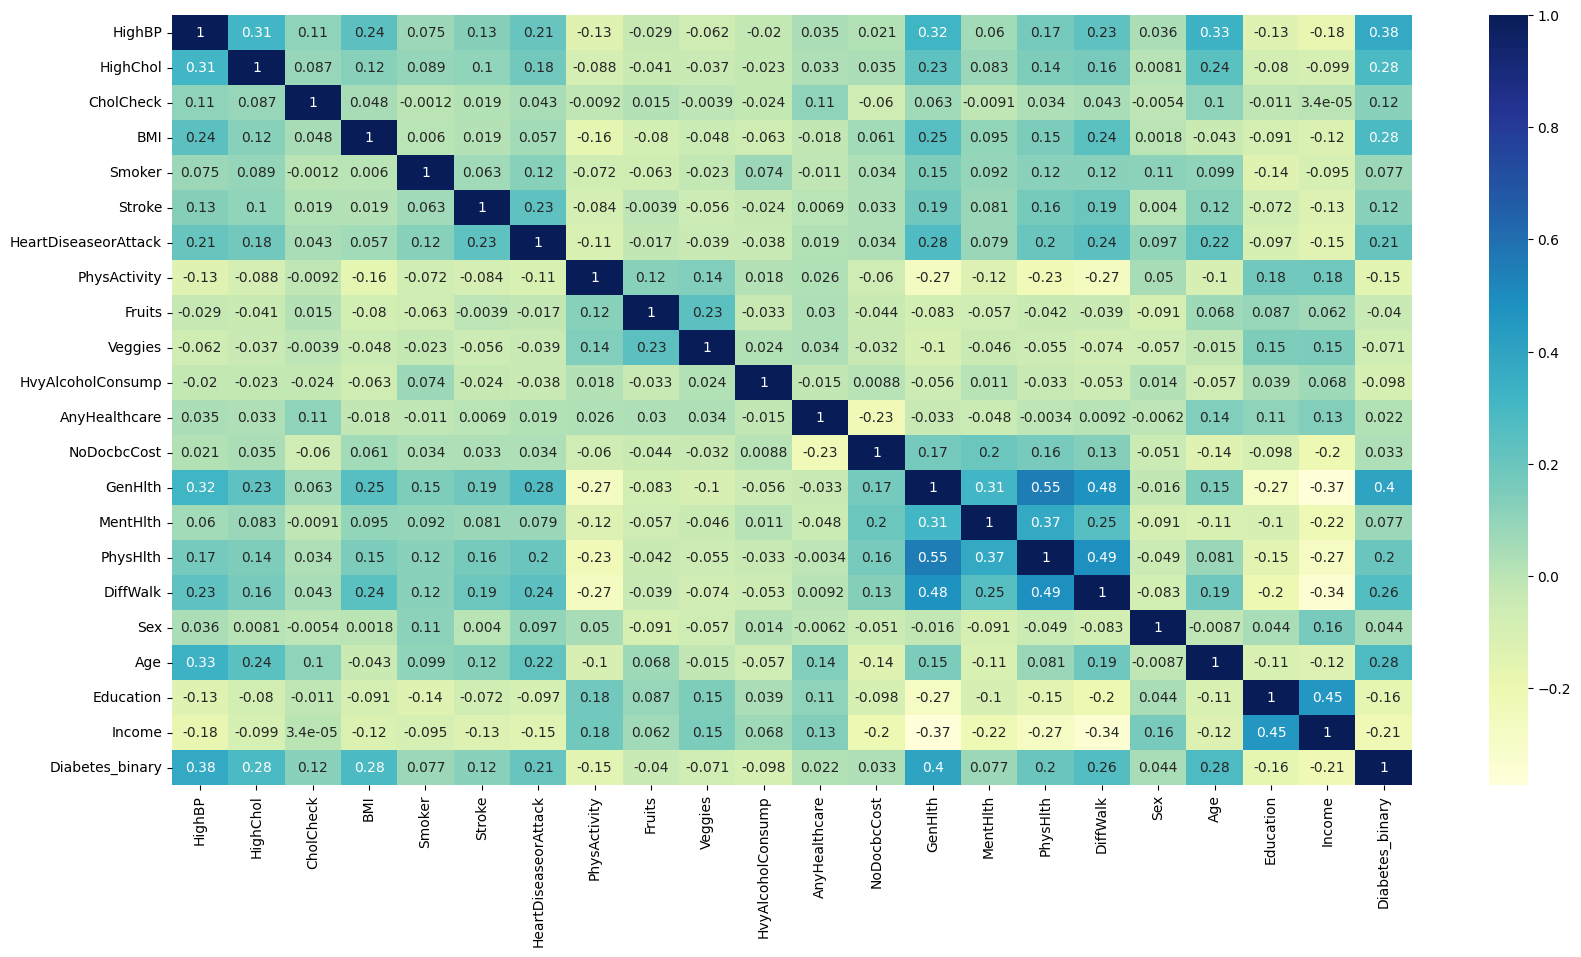

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
print(data.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(5, input_dim = 21, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

results = model.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=0, shuffle = True, validation_data=(X_test, Y_test))
dl_y_pred = (model.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()

431/431 [==============================] - 1s 2ms/step


In [ ]:
# definition to provide the metrics
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays
  act = np.array(act)
  pred = np.array(pred)
  # There may be an easier way to do this, however, I believe it is a manual process!
  for index, item in enumerate(act):
    if item == pred[index]:
      correct += 1
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2)
  print("Accuracy:", accuracy, "%")
  print(pd.crosstab( np.array(act),  np.array(pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

In [ ]:
# Example for Blood Pressure target groups
bp_pred = []      # High Blood Pressure was label encoded as 1
bp_actual_class = []

bpN_pred = []        # Non-high Blood Pressure was label encoded as 0
bpN_actual_class = []

for index,row in enumerate(X_test_raw):
    if row[0] == 1:
        bp_pred.append(dl_y_pred[index])
        bp_actual_class.append(Y_test[index])
    elif row[0] == 0:
        bpN_pred.append(dl_y_pred[index])
        bpN_actual_class.append(Y_test[index])

# Print the representation of each target group
print("High Blood Pressure instances in the test set:", len(bp_pred))
print("Non-high Blood Pressure instances in the test set:  ", len(bpN_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("High Blood Pressure", bp_actual_class, bp_pred)
print("\n")
subMetrics("Non-high Blood Pressure", bpN_actual_class, bpN_pred)

High Blood Pressure instances in the test set: 7818
Non-high Blood Pressure instances in the test set:   5947



Metrics for:  High Blood Pressure
Accuracy: 74.48 %
Predicted     0     1   All
Actual                     
0          2763  1085  3848
1           910  3060  3970
All        3673  4145  7818


Metrics for:  Non-high Blood Pressure
Accuracy: 74.89 %
Predicted     0     1   All
Actual                     
0          2130   812  2942
1           681  2324  3005
All        2811  3136  5947


The above target group is about whether the people have high blood pressure or not. The differences instances for non-high and high blood pressure people have almost 2000 different, and mostly high blood pressure has more people suffering diabetes. As we can see from the matrics, more than 65% of high blood pressure people are actually having diabetes as well and only 30% of people having diabetes with non-high blood pressure.

This means that people who suffering diabetes actually will high chances suffering with high blood pressure as well.

In [ ]:
# Example for heart disease group target groups
heart_pred = []      # Heart Diseases was label encoded as 1
heart_actual_class = []

heartN_pred = []        # Non-smoker was label encoded as 0
heartN_actual_class = []

for index,row in enumerate(X_test):
    if row[6] == 1:
        heart_pred.append(dl_y_pred[index])
        heart_actual_class.append(Y_test[index])
    elif row[6] == 0:
        heartN_pred.append(dl_y_pred[index])
        heartN_actual_class.append(Y_test[index])

# Print the representation of each target group
print("Heart Diseases Attack instances in the test set:", len(heart_pred))
print("No Heart Diseases Attack instances in the test set:  ", len(heartN_pred))

print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Heart Disease Attack", heart_actual_class, heart_pred)
print("\n")
subMetrics("No Heart Disease Attack", heartN_actual_class, heartN_pred)

Heart Diseases Attack instances in the test set: 2058
No Heart Diseases Attack instances in the test set:   11707



Metrics for:  Heart Disease Attack
Accuracy: 77.11 %
Predicted    0     1   All
Actual                    
0          111   403   514
1           68  1476  1544
All        179  1879  2058


Metrics for:  No Heart Disease Attack
Accuracy: 74.23 %
Predicted     0     1    All
Actual                      
0          4782  1494   6276
1          1523  3908   5431
All        6305  5402  11707


From the statistic above, I noticed that diabetes would not effect people from getting heart diseases attack. 15% of people have heart diseases attack and diabetes at the same time. This shows that diabetes does not really effect heart problem, but people suffering from heart diseases have high chances to get diabetes which from the metrics (1476 compare to 111).

### Summary and Conclusion

In a conclusion, this deep learning CA aimed to develop a model for predicting diabetes based on the provided dataset. Several experiments were conducted, exploring different network topologies, hyperparameter tuning, and regularization techniques. We also used the GridSearch CV to get the best model after trying with different combination of hyperparameter and techniques. The performance of the models was evaluated by plotting loss and accuracy graph and using confusion metrics which included accuracy, precision, recall, and F1-score.


The analysis shows that the best-performing model achieved an accuracy of 74% with the following prarameter:
- batch size: 32
- epoch: 80
- optimizer: RMSPROP
- initializer: Glorot Normal.


From the different testing during the regularization techniques, the dropout function shows that it is helpful to prevent overfitting model. However, it still need to be watch out for underfitting problem might occer. Besides that, the bias / no-bias function had shown that both of the output are very similar, so I had continue the model with bias as it is non ethical if the model no able to accept any outlier. The early stopping helps to prevent wasting memory and times of computer power which is very effective when doing the Grid Search CV function.

In [ ]:
%%shell
jupyter nbconvert --to html /content/CA1.ipynb

[NbConvertApp] Converting notebook /content/CA1.ipynb to html
[NbConvertApp] Writing 3405804 bytes to /content/CA1.html
